In [1]:
# import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import matplotlib
import statsmodels
import pylab as py
import scipy
import scipy.stats as stats

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

### 1. Understanding the data

In [2]:
sns.set(font_scale=1.5)
# see the data with all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',500)
pd.set_option('display.width', 1000)

In [3]:
# We need to first read the data into a data frame
housing_data = pd.read_csv('train.csv')
housing_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ       706.0          Unf         0.0      150.0        856.0    GasA        Ex          Y      SBrkr     856.0     854.0           0.0     1710.0           1.0           0.0       2.0       1.0           3.0           1.0          Gd           8.0        Typ         0.0         NaN     Attchd       2003.0          RFn         2.0       548.0         TA         TA          Y         0.0         61.0            0.0        0.0          0.0       0.0    NaN   NaN         NaN      0.0     2.0  2008.0       WD        Normal   208500.0
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ       978.0          Unf         0.0      284.0       1262.0    GasA        Ex          Y      SBrkr    1262.0       0.0           0.0     1262.0           0.0           1.0       2.0       0.0           3.0           1.0          TA           6.0        Typ         1.0          TA     Attchd       1976.0          RFn         2.0       460.0         TA         TA          Y       298.0          0.0            0.0        0.0          0.0       0.0    NaN   NaN         NaN      0.0     5.0  2007.0       WD        Normal   181500.0
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ       486.0          Unf         0.0      434.0        920.0    GasA        Ex          Y      SBrkr     920.0     866.0           0.0     1786.0           1.0           0.0       2.0       1.0           3.0           1.0          Gd           6.0        Typ         1.0          TA     Attchd       2001.0          RFn         2.0       608.0         TA         TA          Y         0.0         42.0            0.0        0.0          0.0       0.0    NaN   NaN         NaN      0.0     9.0  2008.0       WD        Normal   223500.0
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ       216.0          Unf         0.0      540.0        756.0   

In [4]:
#Check the statistical information of the data
housing_data.describe()

Id  MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath    HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  ScreenPorch    PoolArea     MiscVal      MoSold       YrSold      SalePrice
count  299.000000  299.000000   249.000000     299.000000   299.000000   299.000000   299.000000    299.000000   297.000000   298.000000   298.000000   298.000000   298.000000   298.000000   298.000000    298.000000   298.000000    298.000000    298.000000  298.000000  298.000000    298.000000    298.000000    298.000000  298.000000   278.000000  298.000000   298.000000  298.000000   298.000000     298.000000  298.000000   298.000000  298.000000  298.000000  298.000000   298.000000     298.000000
mean   150.000000   54.381271    71.353414   10456.732441     6.117057     5.548495  1972.287625   1985.431438   123.474747   431.426174    47.661074   582.100671  1061.187919  1162.624161   347.013423     13.167785  1522.805369      0.382550      0.063758    1.573826    0.382550      2.852349      1.050336      6.466443    0.607383  1979.179856    1.734899   464.959732   94.708054    47.610738      19.610738    9.100671    14.228188    1.718121   21.744966    5.959732  2007.828859  181657.325503
std     86.458082   42.315947    23.761661    9870.735993     1.311926     1.049204    29.498792     20.237959   215.608975   427.736785   166.552534   442.996443   397.808159   358.074320   439.703657     74.362920   490.908725      0.500469      0.244733    0.547033    0.493695      0.790310      0.233874      1.490898    0.659210    24.995524    0.752229   210.563582  127.298525    60.073043      59.977068   51.445142    53.750655   29.659364  104.920888    2.790989     1.388107   74011.039001
min      1.000000   20.000000    21.000000    1596.000000     3.000000     2.000000  1885.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   483.000000     0.000000      0.000000   520.000000      0.000000      0.000000    0.000000    0.000000      0.000000      1.000000      3.000000    0.000000  1900.000000    0.000000     0.000000    0.000000     0.000000       0.000000    0.000000     0.000000    0.000000    0.000000    1.000000  2006.000000   40000.000000
25%     75.500000   20.000000    60.000000    7589.000000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   271.000000   803.250000   890.250000     0.000000      0.000000  1162.500000      0.000000      0.000000    1.000000    0.000000      2.000000      1.000000      5.000000    0.000000  1962.000000    1.000000   336.500000    0.000000     0.000000       0.000000    0.000000     0.000000    0.000000    0.000000    4.000000  2007.000000  129925.000000
50%    150.000000   50.000000    70.000000    9525.000000     6.000000     5.000000  1975.000000   1993.000000     0.000000   381.500000     0.000000   477.500000  1016.500000  1098.500000     0.000000      0.000000  1469.000000      0.000000      0.000000    2.000000    0.000000      3.000000      1.000000      6.000000    1.000000  1984.500000    2.000000   471.500000    0.000000    29.000000       0.000000    0.000000     0.000000    0.000000    0.000000    6.000000  2008.000000  166500.000000
75%    224.500000   60.000000    82.000000   11417.500000     7.000000     6.000000  2001.000000   2004.000000   186.000000   695.000000     0.000000   816.000000  1304.000000  1373.750000   729.750000      0.000000  1767.750000      1.000000      0.000000    2.000000    1.000000      3.000000      1.000000      7.000000    1.000000  2003.000000    2.000000   576.000000  168.000000    72.000000       0.000000    0.000000     0.000000    0.000000    0.000000    7.000000  2009.000000  219875.000000

In [5]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             299 non-null    int64  
 1   MSSubClass     299 non-null    int64  
 2   MSZoning       299 non-null    object 
 3   LotFrontage    249 non-null    float64
 4   LotArea        299 non-null    int64  
 5   Street         299 non-null    object 
 6   Alley          17 non-null     object 
 7   LotShape       299 non-null    object 
 8   LandContour    299 non-null    object 
 9   Utilities      299 non-null    object 
 10  LotConfig      299 non-null    object 
 11  LandSlope      299 non-null    object 
 12  Neighborhood   299 non-null    object 
 13  Condition1     299 non-null    object 
 14  Condition2     299 non-null    object 
 15  BldgType       299 non-null    object 
 16  HouseStyle     299 non-null    object 
 17  OverallQual    299 non-null    int64  
 18  OverallCon

As we can see, there are 1460 rows and 81 columns. It consists of categorical and continuous variables, for our analysis we need to perform EDA to figure out which variables are useful for building the model.

### 2. Cleaning of the data

In [6]:
#Finding the missing values
housing_data.isnull().sum().sum()

1485

In [7]:
#Show the missing value column names
housing_data.columns[housing_data.isnull().any()]

Index(['LotFrontage', 'Alley', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'], dtype='object')

In [8]:
columns_nan =  housing_data.columns[housing_data.isnull().any()]

for c in columns_nan:
    print(c, housing_data[c].isnull().sum())

LotFrontage 50
Alley 282
RoofMatl 1
Exterior1st 1
Exterior2nd 1
MasVnrType 2
MasVnrArea 2
ExterQual 1
ExterCond 1
Foundation 1
BsmtQual 8
BsmtCond 8
BsmtExposure 8
BsmtFinType1 8
BsmtFinSF1 1
BsmtFinType2 8
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
Heating 1
HeatingQC 1
CentralAir 1
Electrical 1
1stFlrSF 1
2ndFlrSF 1
LowQualFinSF 1
GrLivArea 1
BsmtFullBath 1
BsmtHalfBath 1
FullBath 1
HalfBath 1
BedroomAbvGr 1
KitchenAbvGr 1
KitchenQual 1
TotRmsAbvGrd 1
Functional 1
Fireplaces 1
FireplaceQu 146
GarageType 21
GarageYrBlt 21
GarageFinish 21
GarageCars 1
GarageArea 1
GarageQual 21
GarageCond 21
PavedDrive 1
WoodDeckSF 1
OpenPorchSF 1
EnclosedPorch 1
3SsnPorch 1
ScreenPorch 1
PoolArea 1
PoolQC 298
Fence 231
MiscFeature 286
MiscVal 1
MoSold 1
YrSold 1
SaleType 1
SaleCondition 1
SalePrice 1


In [9]:
#We need to check the percentage of missing data
nullval = pd.DataFrame(round(housing_data.isnull().sum()/len(housing_data.index)*100,2).sort_values(ascending=False),columns=["Null values in %"])
nullval.index.name = 'Feature names'
nullval.head(10)

Null values in %
Feature names                  
PoolQC                    99.67
MiscFeature               95.65
Alley                     94.31
Fence                     77.26
FireplaceQu               48.83
LotFrontage               16.72
GarageYrBlt                7.02
GarageFinish               7.02
GarageType                 7.02
GarageQual                 7.02

As we can see, there are five columns having significant percentage of missing data, which suggests that they may not be valuable in the first place, so we can drop them. 

In [10]:
#dropping the columns with more than 45% missing data
for col in columns_nan:
    if housing_data[col].isnull().sum()*100/housing_data.shape[0]>45:
        housing_data.drop(col,1, inplace=True)

C:\Users\419340\AppData\Local\Temp\ipykernel_36608\1772120704.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  housing_data.drop(col,1, inplace=True)
C:\Users\419340\AppData\Local\Temp\ipykernel_36608\1772120704.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  housing_data.drop(col,1, inplace=True)
C:\Users\419340\AppData\Local\Temp\ipykernel_36608\1772120704.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  housing_data.drop(col,1, inplace=True)
C:\Users\419340\AppData\Local\Temp\ipykernel_36608\1772120704.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  housing_data.drop(col,1, inplace=True)
C:\Users\419340\AppData\Local\Temp\i

In [11]:
housing_data.shape

(299, 76)

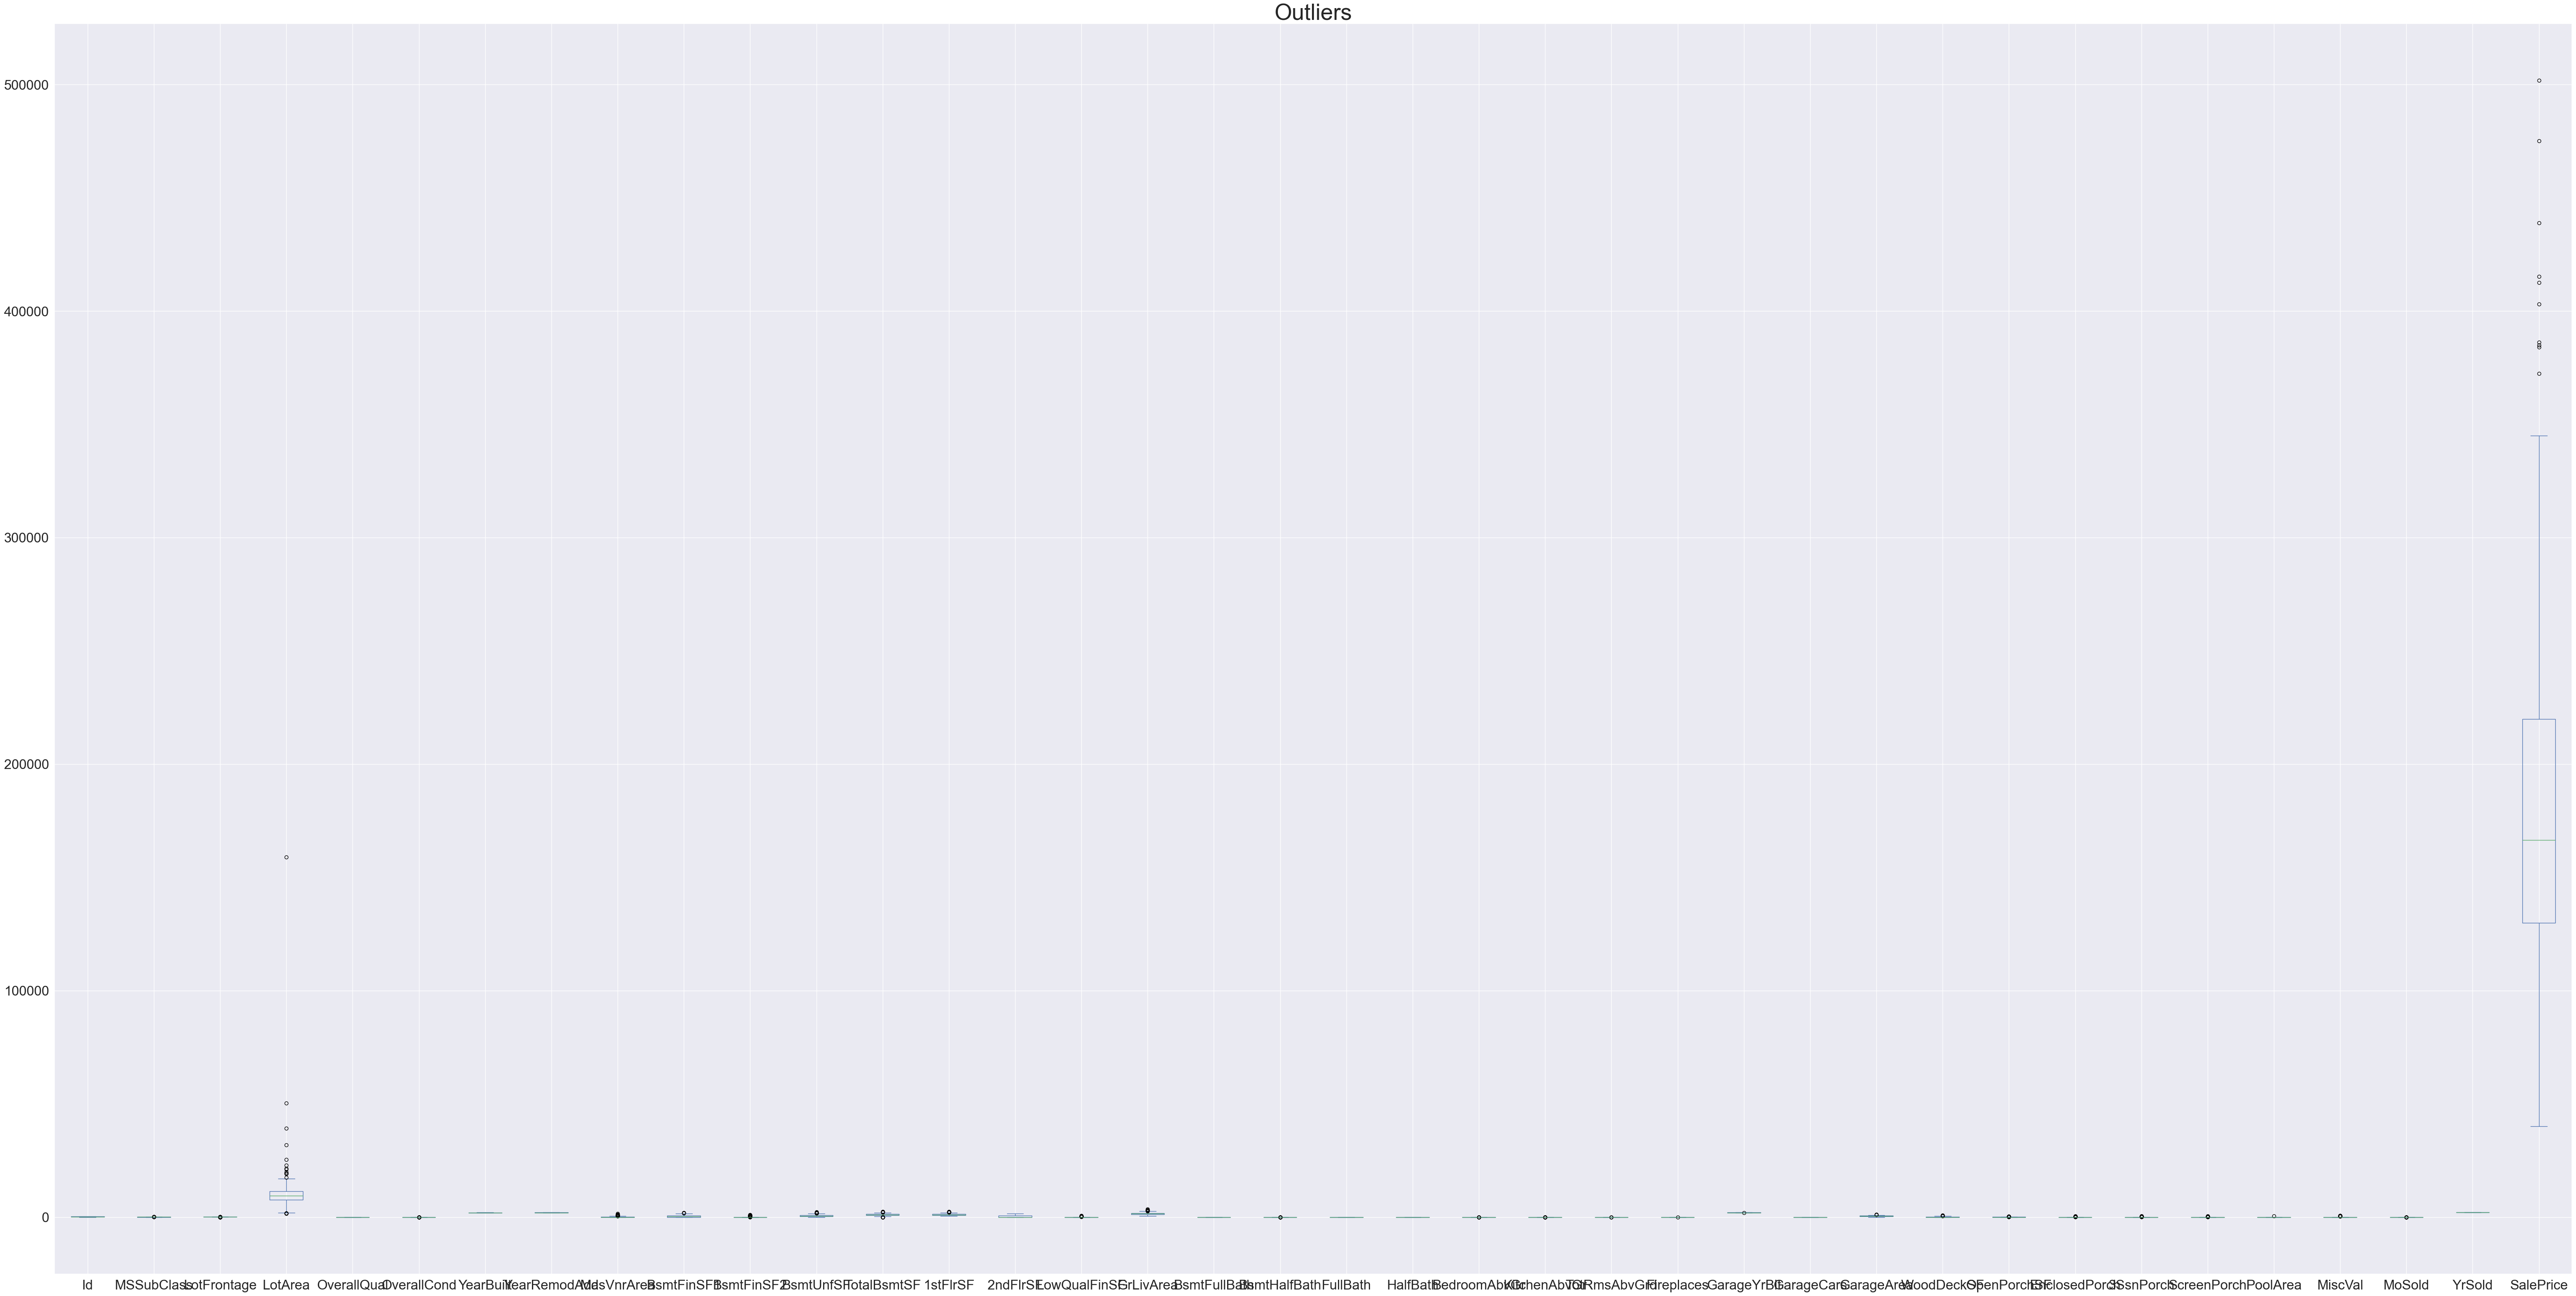

In [12]:
# We need to visualise the outliers with boxplot

fig=housing_data.plot.box(title='Outliers', figsize=(80, 40), legend=True, fontsize=24)
fig.axes.title.set_size(40)

From the above plot we can see that , LotArea and SalesPrice has more number of outliers.

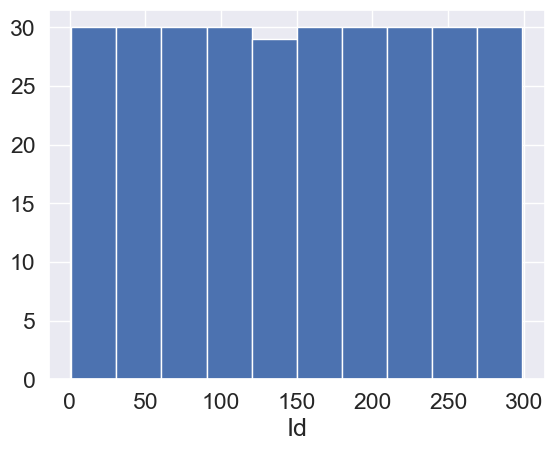

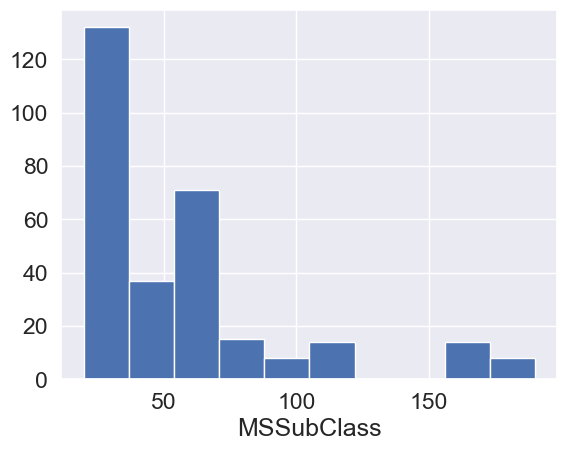

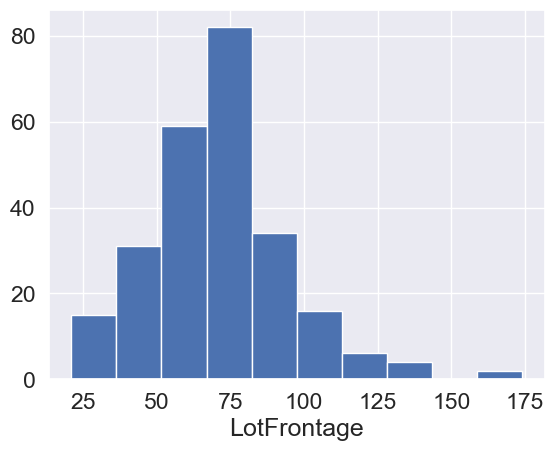

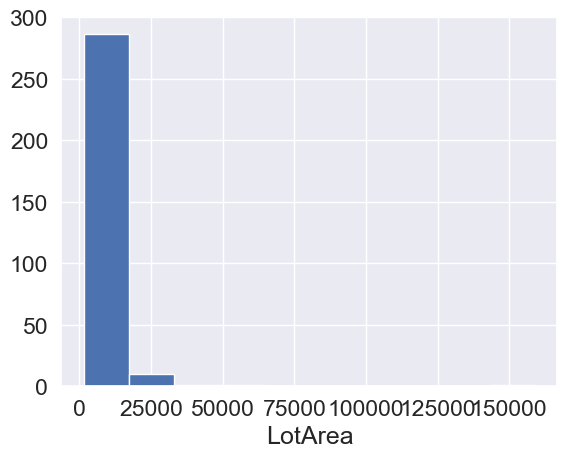

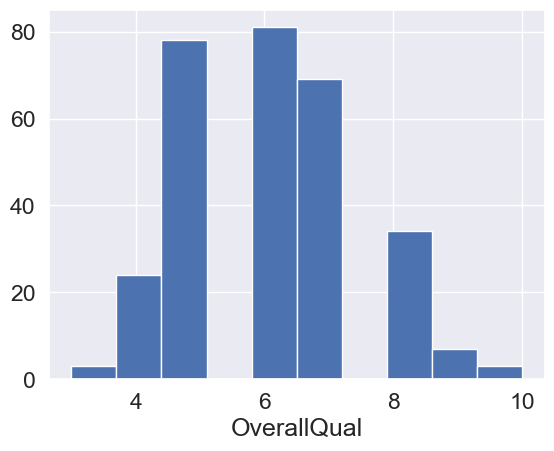

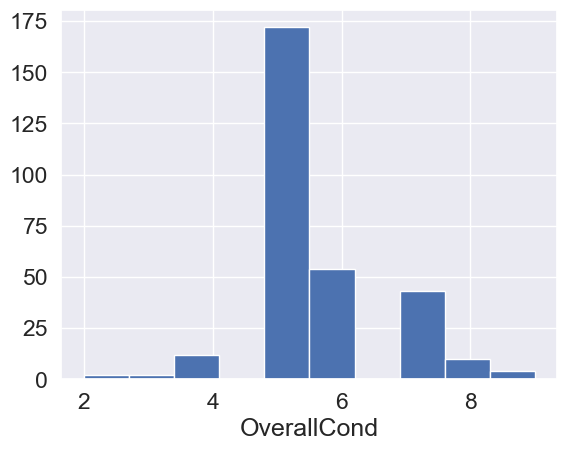

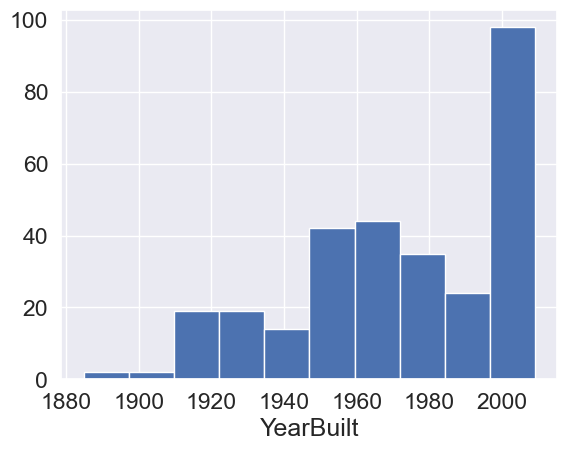

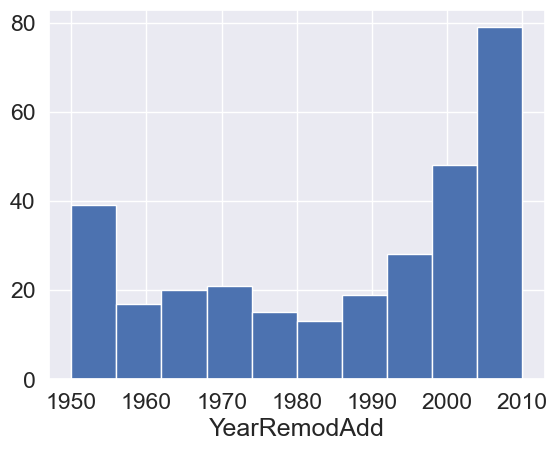

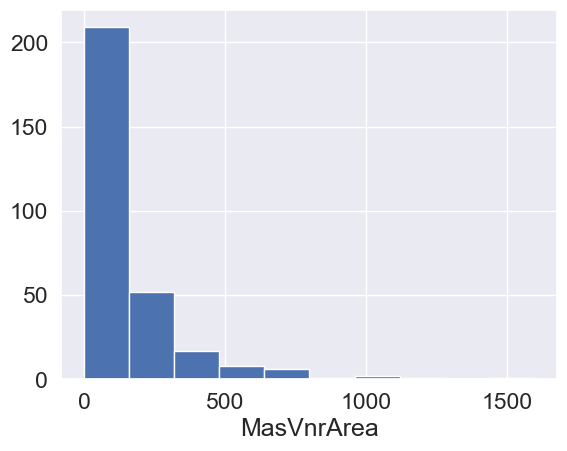

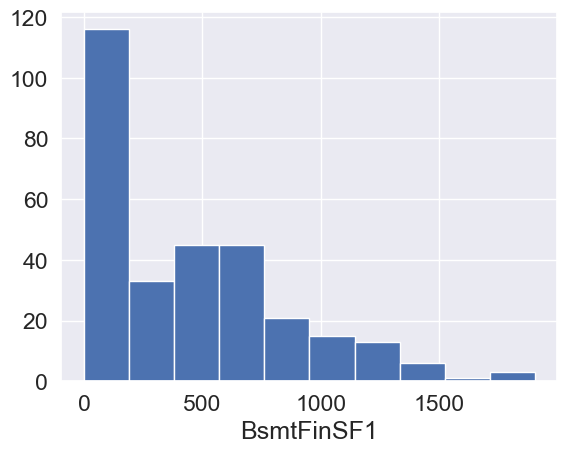

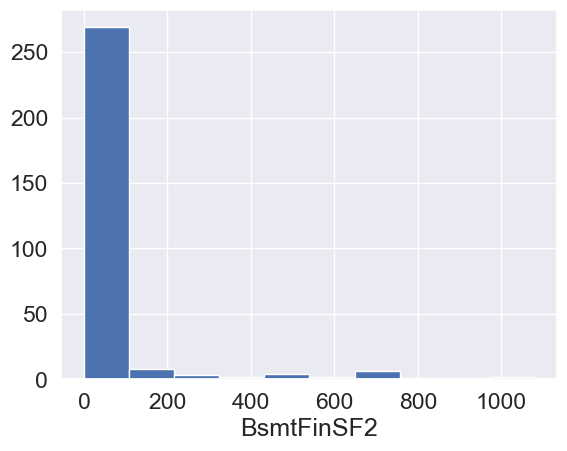

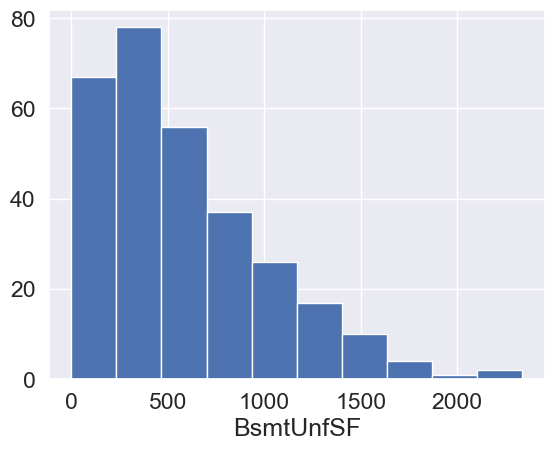

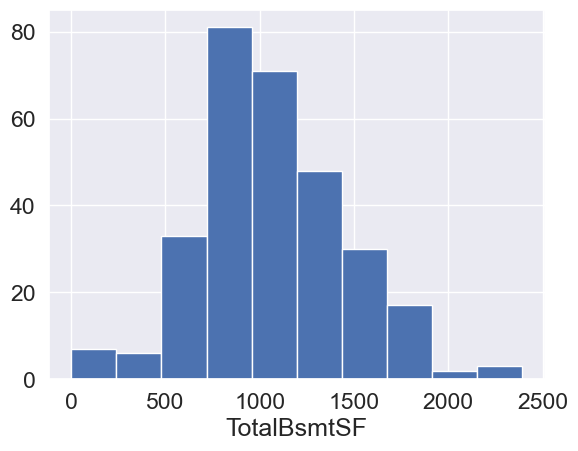

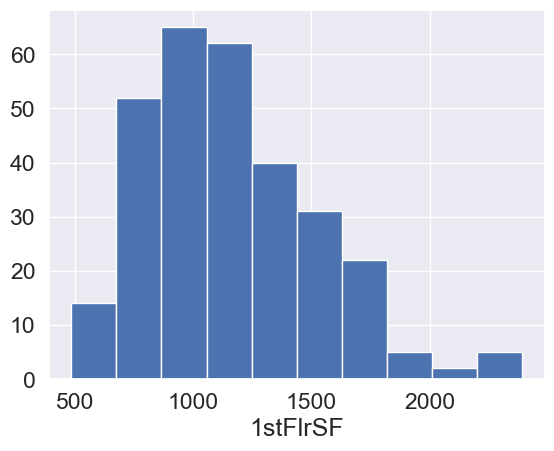

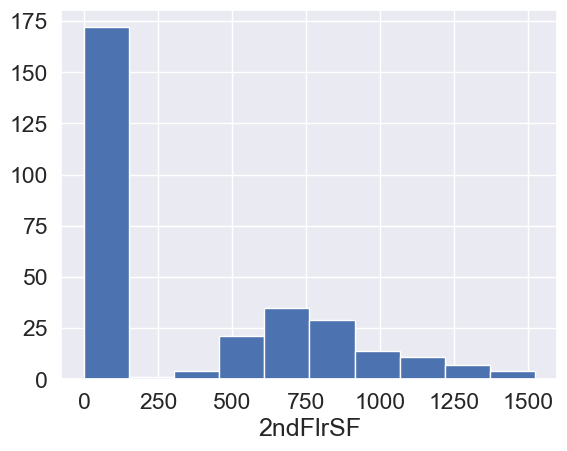

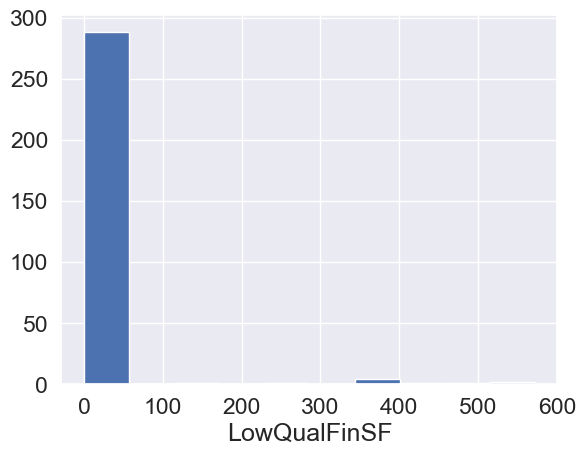

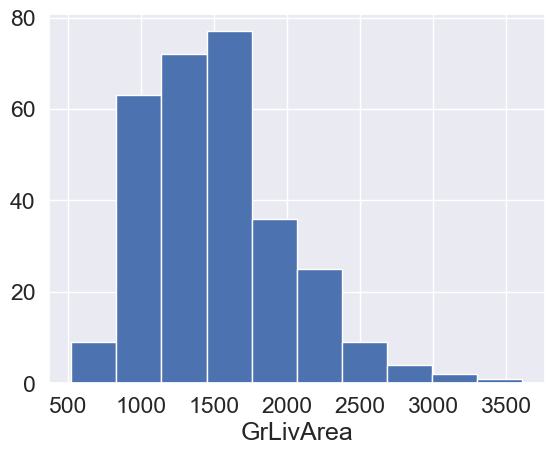

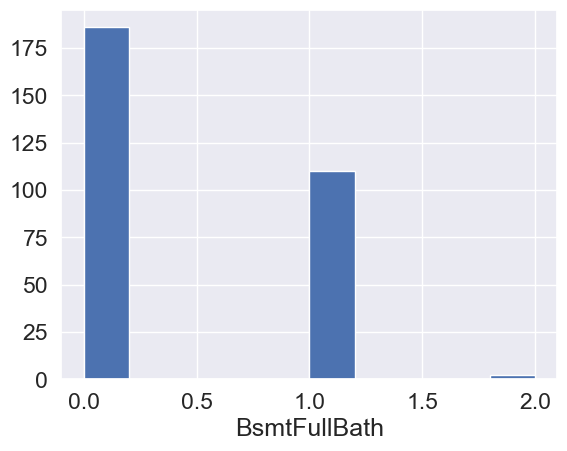

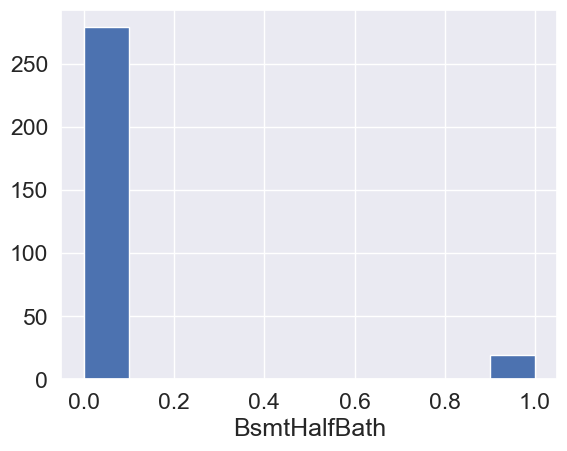

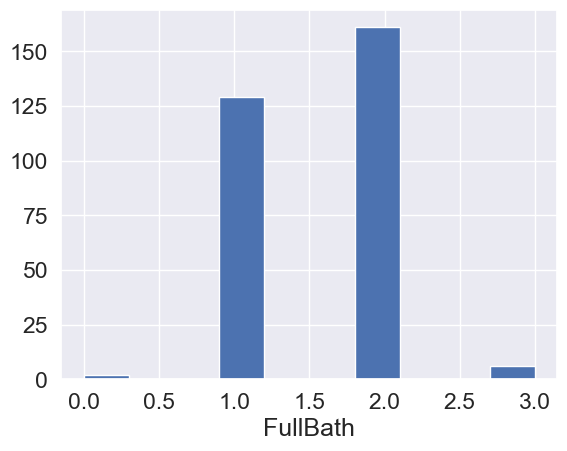

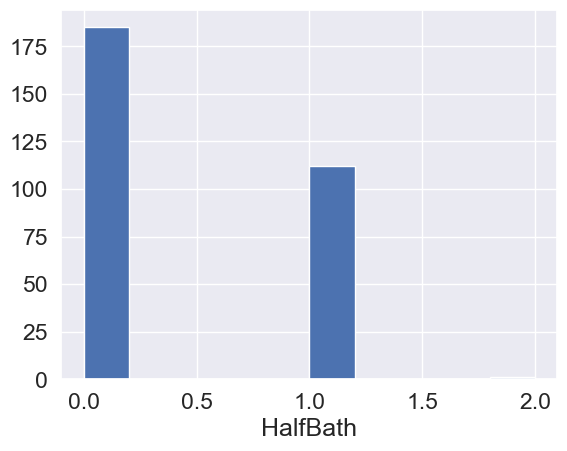

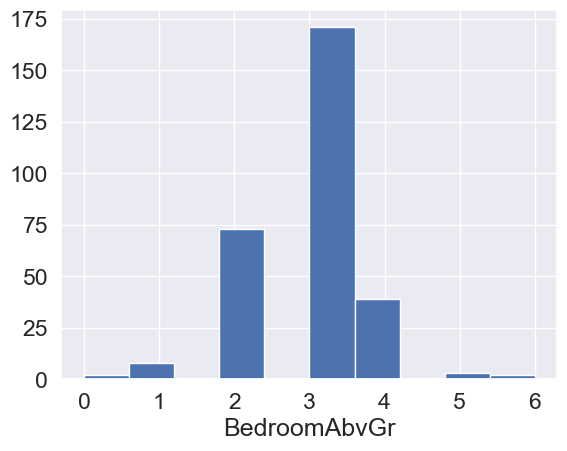

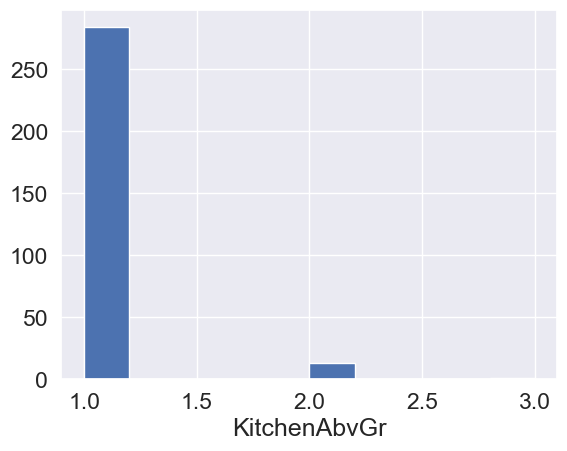

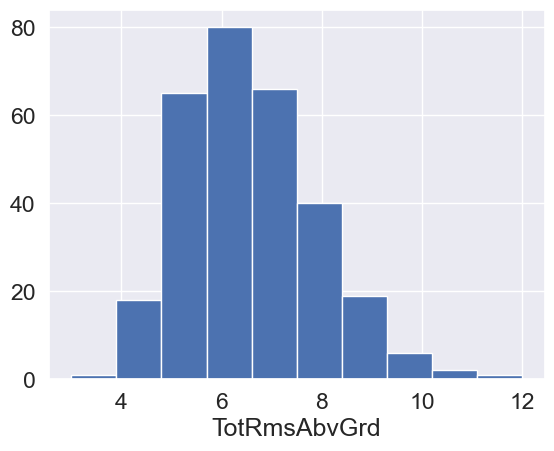

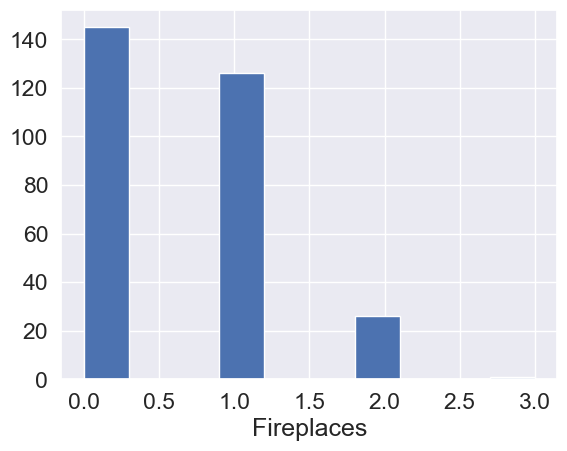

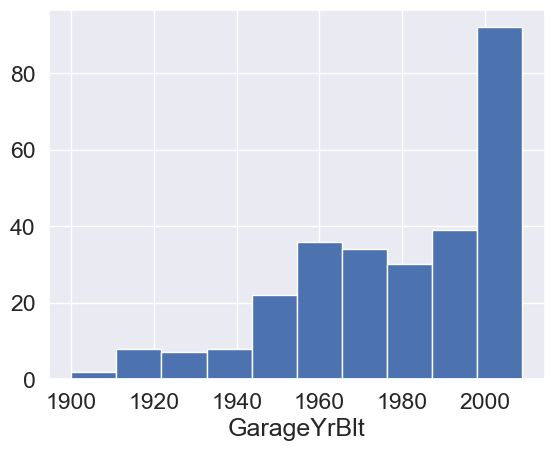

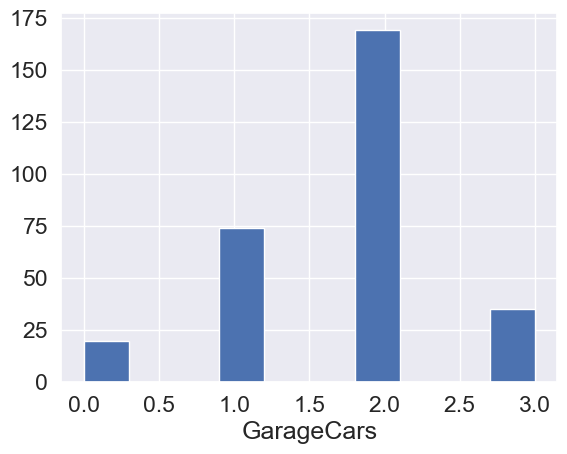

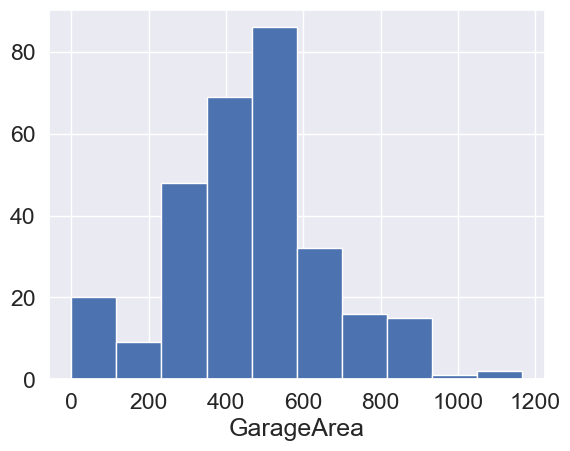

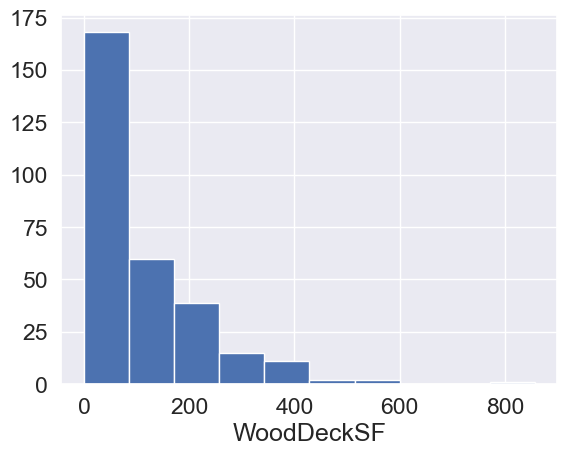

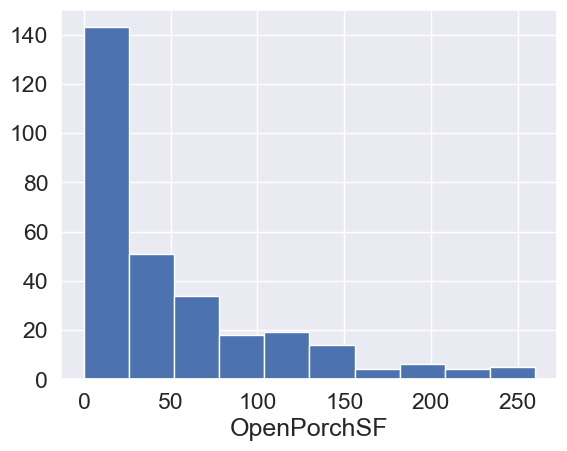

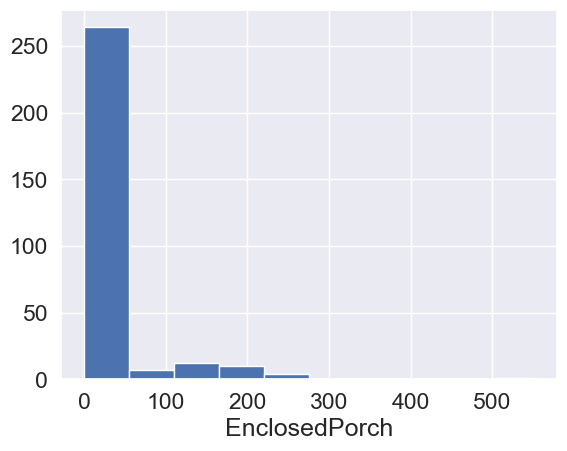

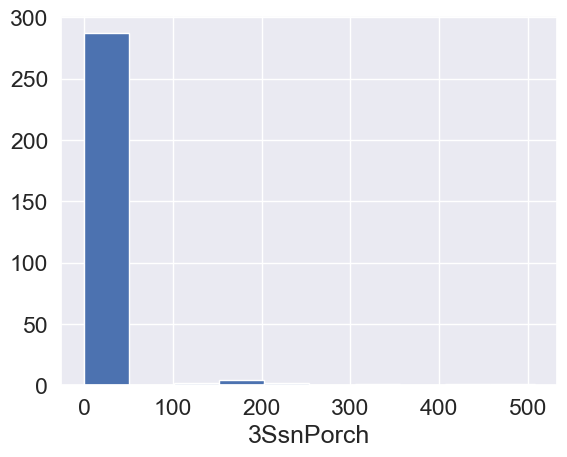

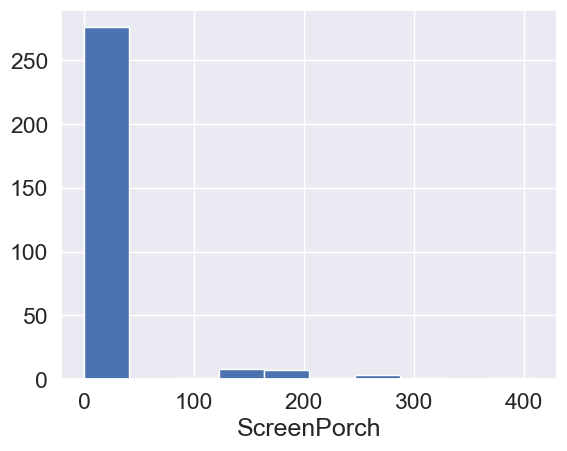

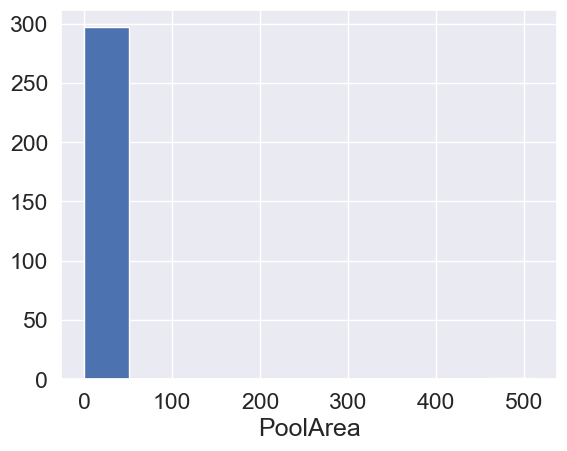

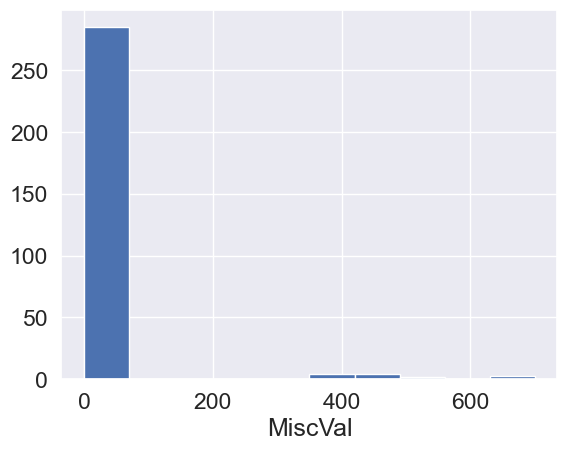

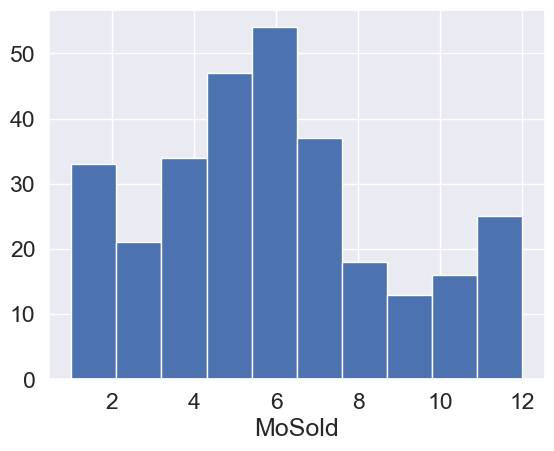

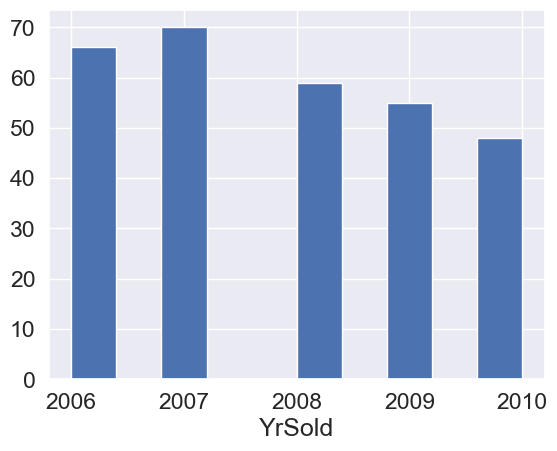

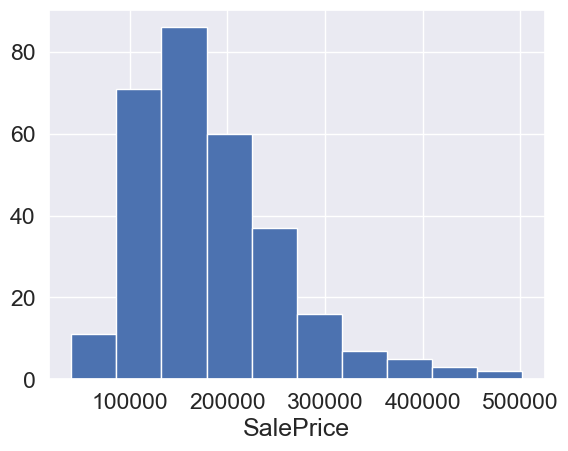

In [13]:
# Now we need to check the numerical data which are more skewed
numerical_features=[feature for feature in housing_data.columns if housing_data[feature].dtypes!='object']
for feature in numerical_features:
        housing_data[feature].hist()
        plt.xlabel(feature)
        plt.show()

From the above plots we can see that the columns LowQualFinSF, PoolArea, MiscVal, and 3SsnPorch has very less variation in its values. This observation is checked through value_counts.

In [14]:
print(housing_data['LowQualFinSF'].value_counts())
print(housing_data['PoolArea'].value_counts())
print(housing_data['MiscVal'].value_counts())
print(housing_data['3SsnPorch'].value_counts())

0.0      288
360.0      1
513.0      1
234.0      1
528.0      1
572.0      1
144.0      1
392.0      1
371.0      1
390.0      1
420.0      1
Name: LowQualFinSF, dtype: int64
0.0      297
512.0      1
Name: PoolArea, dtype: int64
0.0      285
700.0      3
400.0      3
450.0      3
500.0      2
350.0      1
480.0      1
Name: MiscVal, dtype: int64
0.0      287
180.0      2
320.0      1
407.0      1
130.0      1
168.0      1
140.0      1
508.0      1
238.0      1
245.0      1
196.0      1
Name: 3SsnPorch, dtype: int64


So, it is clear that columns LowQualFinSF, PoolArea, MiscVal, and 3SsnPorch has negigible variety in its values , so it will not add any value in the model building, thereby they are being dropped. 

In [15]:
housing_data=housing_data.drop(['LowQualFinSF','PoolArea','MiscVal','3SsnPorch'],axis=1)

In [16]:
housing_data.shape

(299, 72)

It is better to impute the missing values with the median whenever we observe that the data is skewed. From the above histograms we can determine which features will use the median to impute the missing values.

In [17]:
#We need to re-check the amount of missing values in the columns
columns_nan =  housing_data.columns[housing_data.isnull().any()]

for c in columns_nan:
    print(c, housing_data[c].isnull().sum())

LotFrontage 50
RoofMatl 1
Exterior1st 1
Exterior2nd 1
MasVnrType 2
MasVnrArea 2
ExterQual 1
ExterCond 1
Foundation 1
BsmtQual 8
BsmtCond 8
BsmtExposure 8
BsmtFinType1 8
BsmtFinSF1 1
BsmtFinType2 8
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
Heating 1
HeatingQC 1
CentralAir 1
Electrical 1
1stFlrSF 1
2ndFlrSF 1
GrLivArea 1
BsmtFullBath 1
BsmtHalfBath 1
FullBath 1
HalfBath 1
BedroomAbvGr 1
KitchenAbvGr 1
KitchenQual 1
TotRmsAbvGrd 1
Functional 1
Fireplaces 1
GarageType 21
GarageYrBlt 21
GarageFinish 21
GarageCars 1
GarageArea 1
GarageQual 21
GarageCond 21
PavedDrive 1
WoodDeckSF 1
OpenPorchSF 1
EnclosedPorch 1
ScreenPorch 1
MoSold 1
YrSold 1
SaleType 1
SaleCondition 1
SalePrice 1


In [18]:
#Imputing with the median
housing_data['LotFrontage']=housing_data['LotFrontage'].fillna(housing_data['LotFrontage'].median())
housing_data['GarageYrBlt']=housing_data['GarageYrBlt'].fillna(housing_data['GarageYrBlt'].median())
housing_data['MasVnrArea']=housing_data['MasVnrArea'].fillna(housing_data['MasVnrArea'].median())

In [19]:
#For categorical variables we imputing with mode
for col in ('MasVnrType', 'GarageCond', 'GarageType', 'GarageFinish','GarageQual','BsmtExposure', 'BsmtFinType2', 'BsmtFinType1','BsmtCond','BsmtQual', 'Electrical'):
    
    housing_data[col] = housing_data[col].fillna(housing_data[col].mode()[0])

In [20]:
# Checking the presence of any more null values
housing_data.isnull().values.any()

True

There are no more missing values in the dataset. 

It was observed from the histograms that not all data is normally distributed. Even for the data that appears to be normally distributed, there may be outliers which was visualised above. Now we need to address this issue.

C:\Users\419340\AppData\Local\Temp\ipykernel_36608\1279441308.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_data['BedroomAbvGr'],color='b')


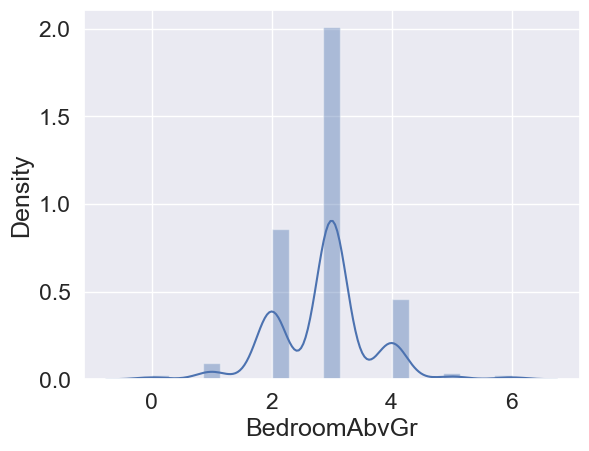

In [21]:
plt.figure()
sns.distplot(housing_data['BedroomAbvGr'],color='b')
plt.show()

C:\Users\419340\AppData\Local\Temp\ipykernel_36608\3090821585.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_data['TotRmsAbvGrd'],color='b')


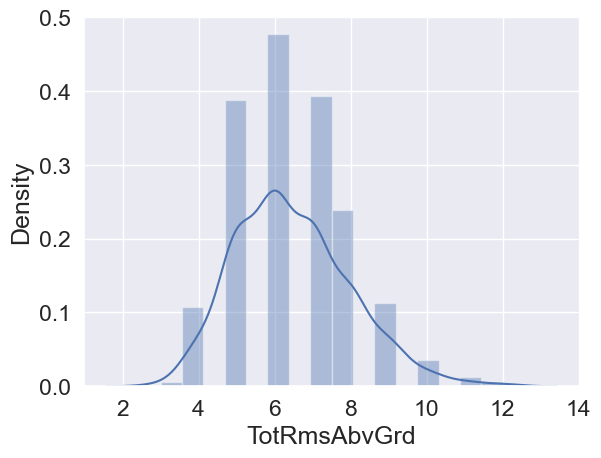

In [22]:
plt.figure()
sns.distplot(housing_data['TotRmsAbvGrd'],color='b')
plt.show()

C:\Users\419340\AppData\Local\Temp\ipykernel_36608\272586194.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_data['SalePrice'],color='b')


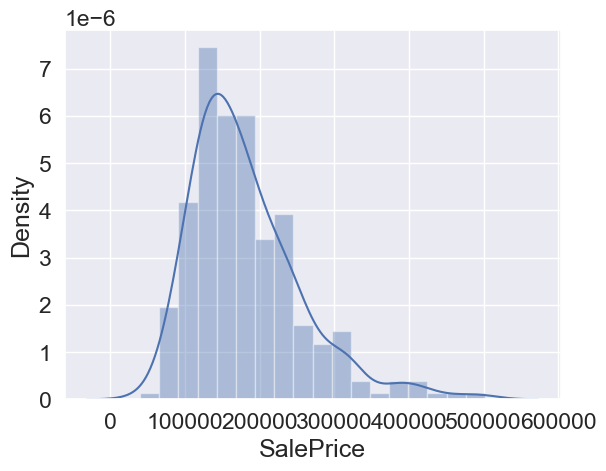

In [23]:
#visualise the dependent variable
plt.figure()
sns.distplot(housing_data['SalePrice'],color='b')
plt.show()

We need to remove the outliers from the columns based on the interquartile range.

In [24]:
# IQR to remove the outlier
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
         'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch','ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'] 

Q1 = housing_data[cols].quantile(0.05)
Q3 = housing_data[cols].quantile(0.95)
IQR = Q3 - Q1

housing_data = housing_data[~((housing_data[cols] < (Q1 - 1.5 * IQR)) |(housing_data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\419340\AppData\Local\Temp\ipykernel_36608\4223514504.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_data['SalePrice'],color='b')


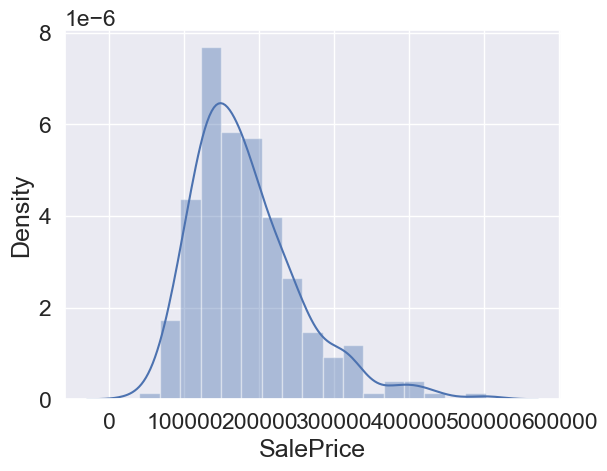

In [25]:
#Lets check if the outlier treatment has indeed helped by looking at the plot
plt.figure()
sns.distplot(housing_data['SalePrice'],color='b')
plt.show()

We can see that some outliers has been removed, but the target variable is skewed to the right. For that we need transform it using log.

C:\Users\419340\AppData\Local\Temp\ipykernel_36608\724676923.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_data['SalePrice'], bins=10)


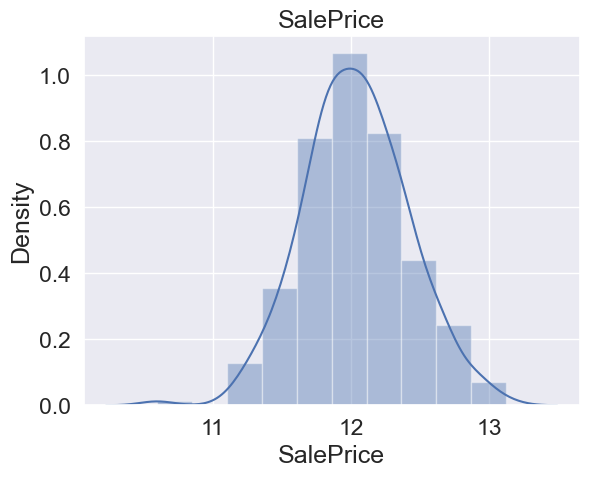

In [26]:
# Let us visualise the target variable SalePrice after transforming it using log

housing_data['SalePrice'] = np.log1p(housing_data['SalePrice'])

plt.title('SalePrice')
sns.distplot(housing_data['SalePrice'], bins=10)
plt.show()

Now, we can see that SalePrice variable has been normalised with some residual noise

### 3. Performing EDA on the dataset

In [27]:
# Let us include all numeric (float and int) variables in the dataset
house_num = housing_data.select_dtypes(include=['float64', 'int64'])
house_num.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  SalePrice
0   1          60         65.0     8450            7            5       2003          2003       196.0       706.0         0.0      150.0        856.0     856.0     854.0     1710.0           1.0           0.0       2.0       1.0           3.0           1.0           8.0         0.0       2003.0         2.0       548.0         0.0         61.0            0.0          0.0     2.0  2008.0  12.247699
1   2          20         80.0     9600            6            8       1976          1976         0.0       978.0         0.0      284.0       1262.0    1262.0       0.0     1262.0           0.0           1.0       2.0       0.0           3.0           1.0           6.0         1.0       1976.0         2.0       460.0       298.0          0.0            0.0          0.0     5.0  2007.0  12.109016
2   3          60         68.0    11250            7            5       2001          2002       162.0       486.0         0.0      434.0        920.0     920.0     866.0     1786.0           1.0           0.0       2.0       1.0           3.0           1.0           6.0         1.0       2001.0         2.0       608.0         0.0         42.0            0.0          0.0     9.0  2008.0  12.317171
3   4          70         60.0     9550            7            5       1915          1970         0.0       216.0         0.0      540.0        756.0     961.0     756.0     1717.0           1.0           0.0       1.0       0.0           3.0           1.0           7.0         1.0       1998.0         3.0       642.0         0.0         35.0          272.0          0.0     2.0  2006.0  11.849405
4   5          60         84.0    14260            8            5       2000          2000       350.0       655.0         0.0      490.0       1145.0    1145.0    1053.0     2198.0           1.0           0.0       2.0       1.0           4.0           1.0           9.0         1.0       2000.0         3.0       836.0       192.0         84.0            0.0          0.0    12.0  2008.0  12.429220

In [28]:
# We can drop the ID column from the data set since it is not useful
housing_data = housing_data.drop(['Id'], axis=1)
house_num = house_num.drop(['Id'], axis=1)
house_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  SalePrice
0          60         65.0     8450            7            5       2003          2003       196.0       706.0         0.0      150.0        856.0     856.0     854.0     1710.0           1.0           0.0       2.0       1.0           3.0           1.0           8.0         0.0       2003.0         2.0       548.0         0.0         61.0            0.0          0.0     2.0  2008.0  12.247699
1          20         80.0     9600            6            8       1976          1976         0.0       978.0         0.0      284.0       1262.0    1262.0       0.0     1262.0           0.0           1.0       2.0       0.0           3.0           1.0           6.0         1.0       1976.0         2.0       460.0       298.0          0.0            0.0          0.0     5.0  2007.0  12.109016
2          60         68.0    11250            7            5       2001          2002       162.0       486.0         0.0      434.0        920.0     920.0     866.0     1786.0           1.0           0.0       2.0       1.0           3.0           1.0           6.0         1.0       2001.0         2.0       608.0         0.0         42.0            0.0          0.0     9.0  2008.0  12.317171
3          70         60.0     9550            7            5       1915          1970         0.0       216.0         0.0      540.0        756.0     961.0     756.0     1717.0           1.0           0.0       1.0       0.0           3.0           1.0           7.0         1.0       1998.0         3.0       642.0         0.0         35.0          272.0          0.0     2.0  2006.0  11.849405
4          60         84.0    14260            8            5       2000          2000       350.0       655.0         0.0      490.0       1145.0    1145.0    1053.0     2198.0           1.0           0.0       2.0       1.0           4.0           1.0           9.0         1.0       2000.0         3.0       836.0       192.0         84.0            0.0          0.0    12.0  2008.0  12.429220

<Figure size 1000x500 with 0 Axes>

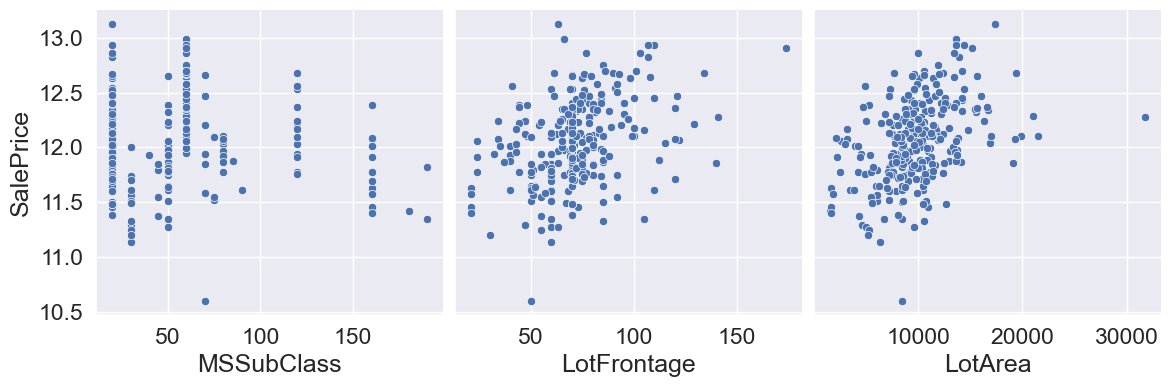

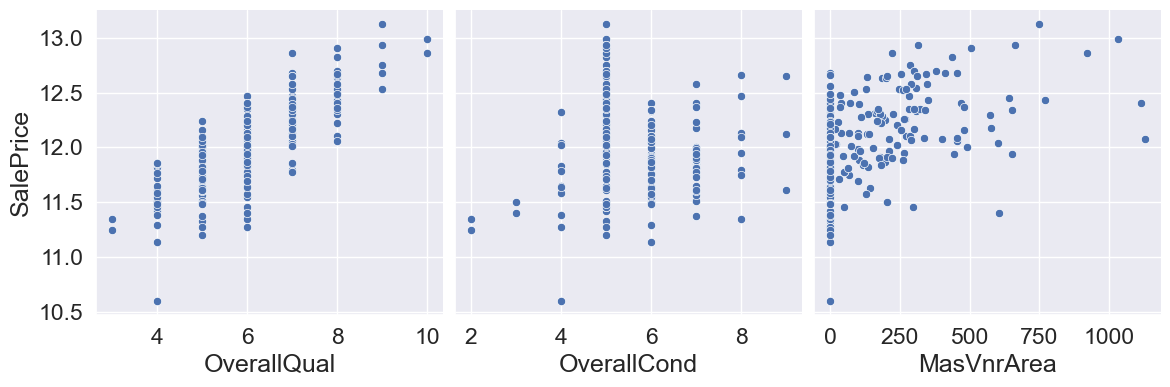

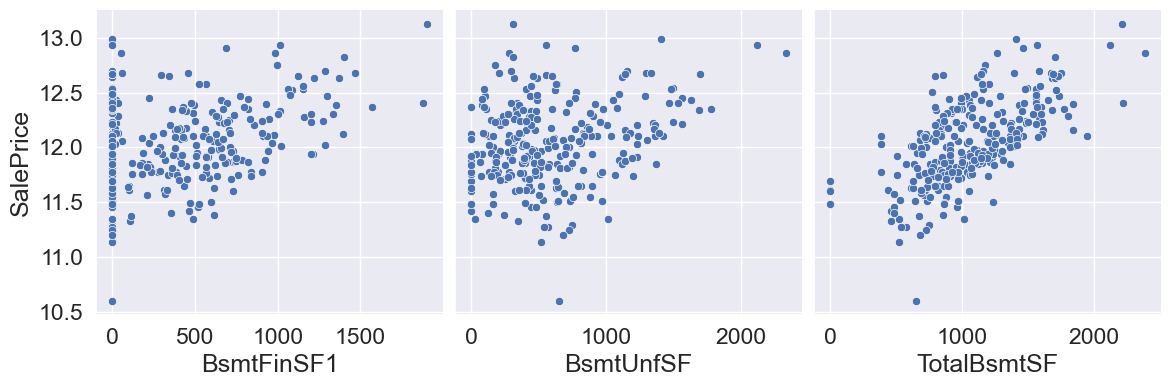

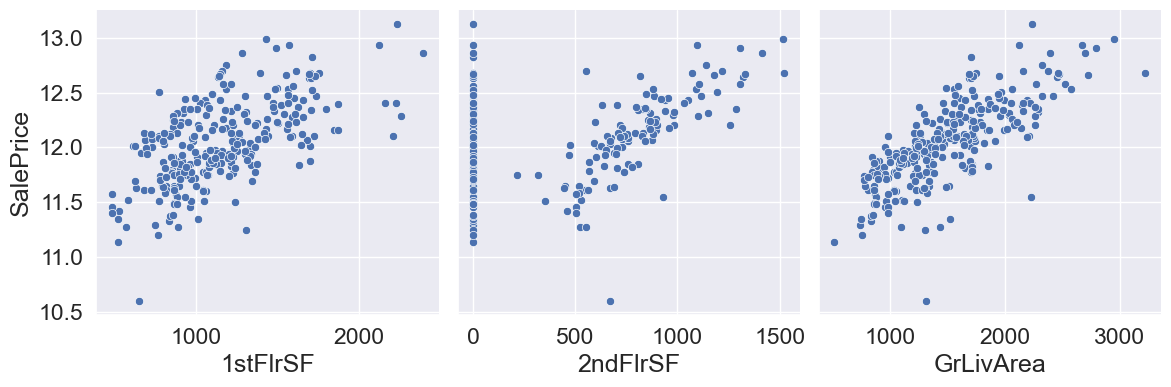

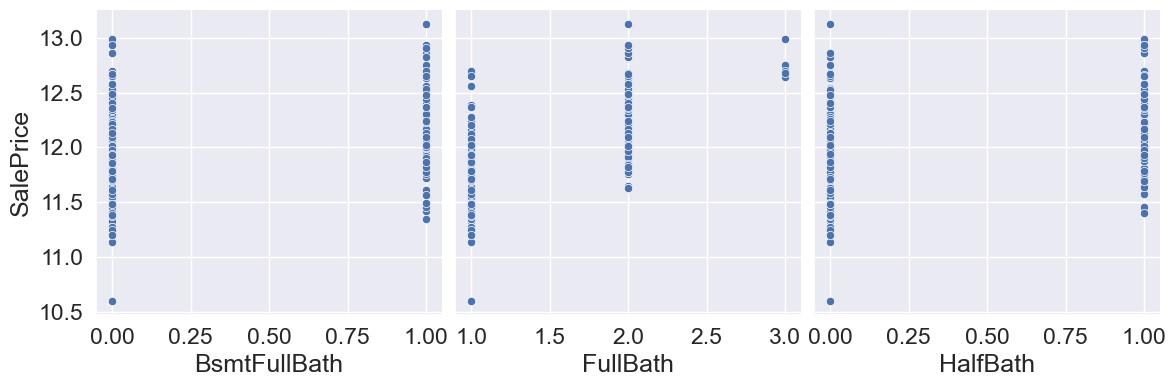

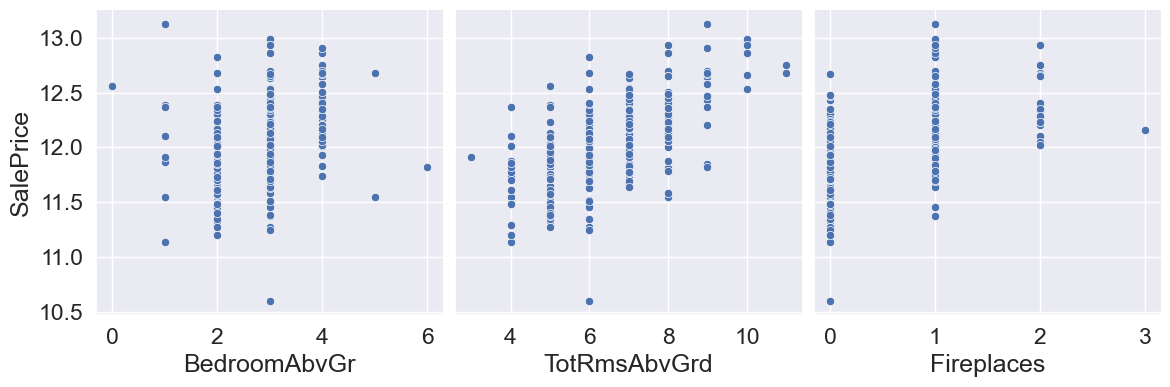

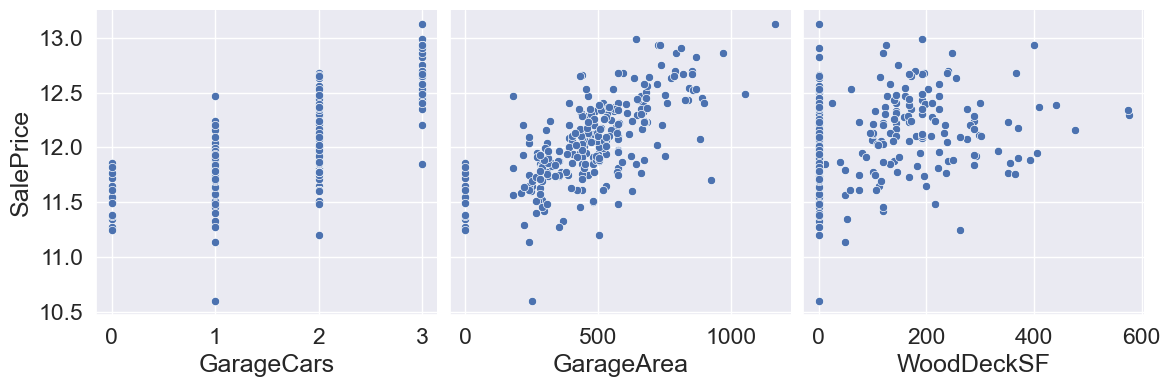

In [29]:
# Now, let us check the relationship between the numerical variables with the target variable using pairplots
plt.figure(figsize=(10,5))
sns.pairplot(housing_data, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

We can see that GrLivArea shows the strongest linearity.

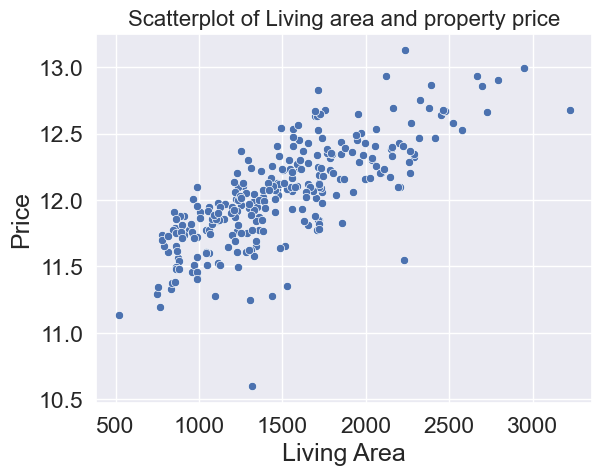

In [30]:
#Lets check the scatter plot for GrLivArea to SalePrice
sns.scatterplot(x='GrLivArea',y='SalePrice' ,data=housing_data)
plt.title('Scatterplot of Living area and property price', fontsize=16)
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.show()

We can see that larger the living area higher goes the price.

In [31]:
#Now, lets check the correlation using the correlation matrix
cor = house_num.corr()
cor

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch    MoSold    YrSold  SalePrice
MSSubClass       1.000000    -0.420863 -0.443621     0.152851    -0.052044   0.106433      0.124411    0.083713   -0.106439   -0.109234  -0.118334    -0.295133 -0.362241  0.395982   0.098188      0.008360     -0.090067  0.177258  0.246324     -0.053145           NaN      0.048531    0.013690     0.186431   -0.002921   -0.084810   -0.071199     0.091623      -0.028859     0.013784  0.060303 -0.119240  -0.038990
LotFrontage     -0.420863     1.000000  0.626930     0.203828    -0.088617   0.165363      0.051283    0.181738    0.036878    0.047944   0.229367     0.318800  0.317408  0.074179   0.306856      0.007300      0.026581  0.172643  0.072921      0.307996           NaN      0.294363    0.222868     0.119834    0.302205    0.318900    0.094931     0.155702       0.047845     0.000974 -0.048597  0.119599   0.384122
LotArea         -0.443621     0.626930  1.000000     0.204811    -0.088302   0.118860      0.014021    0.151113    0.164014    0.106968   0.119003     0.357680  0.432389  0.063935   0.374037      0.149943      0.065468  0.149135  0.091942      0.175256           NaN      0.322131    0.362074    -0.003443    0.300397    0.330923    0.166339     0.170425       0.081612     0.022679  0.023969  0.030998   0.435847
OverallQual      0.152851     0.203828  0.204811     1.000000    -0.115758   0.587135      0.510988    0.509320    0.160577   -0.166770   0.365537     0.517125  0.456195  0.355468   0.647292      0.085534     -0.075208  0.659070  0.249932      0.188494           NaN      0.555674    0.379308     0.526715    0.660417    0.630276    0.194290     0.318341      -0.091648     0.114431  0.107090 -0.053971   0.810570
OverallCond     -0.052044    -0.088617 -0.088302    -0.115758     1.000000  -0.325632      0.022978   -0.164015    0.017289    0.128104  -0.238192    -0.195962 -0.142490 -0.084612  -0.175842      0.050954      0.141639 -0.196786 -0.050086     -0.033380           NaN     -0.128359   -0.037322    -0.272731   -0.153090   -0.152205    0.036226    -0.127010       0.001621    -0.033999 -0.076639 -0.038123  -0.071094
YearBuilt        0.106433     0.165363  0.118860     0.587135    -0.325632   1.000000      0.613553    0.307093    0.247504   -0.133098   0.209051     0.449579  0.293977  0.170722   0.341386      0.151407     -0.029342  0.577311  0.264701      0.042987           NaN      0.244294    0.178092     0.780861    0.589915    0.540835    0.250983     0.315597      -0.408283     0.021043  0.013997  0.056564   0.648270
YearRemodAdd     0.124411     0.051283  0.014021     0.510988     0.022978   0.613553      1.000000    0.171782    0.110649   -0.126080   0.220929     0.316772  0.240228  0.205439   0.354131      0.148226      0.006079  0.513082  0.199265      0.060038           NaN      0.302486    0.067684     0.620965    0.486052    0.416369    0.166777     0.256266      -0.253498     0.082763  0.092254  0.049654   0.569657
MasVnrArea       0.083713     0.181738  0.151113     0.509320    -0.164015   0.307093      0.171782    1.000000    0.212218   -0.063066   0.180710     0.408524  0.366548  0.176985   0.423739      0.052881      0.018014  0.326264  0.184410      0.101381           NaN      0.329871    0.346027     0.230740    0.360229    0.361133    0.148070     0.108529      -0.040126     0.066169  0.062247 -0.018331   0.465333
BsmtFinSF1      -0.106439     0.036878  0.164014     0.160577     0.017289   0.247504      0.110649    0.212218    1.000000   -0.068043  -0.559057     0.431100  0.385295 -0.138498   0.150570      0.592509      0.152496  0.084970 -0.073126     -0.055713           NaN      0.070715    0.271

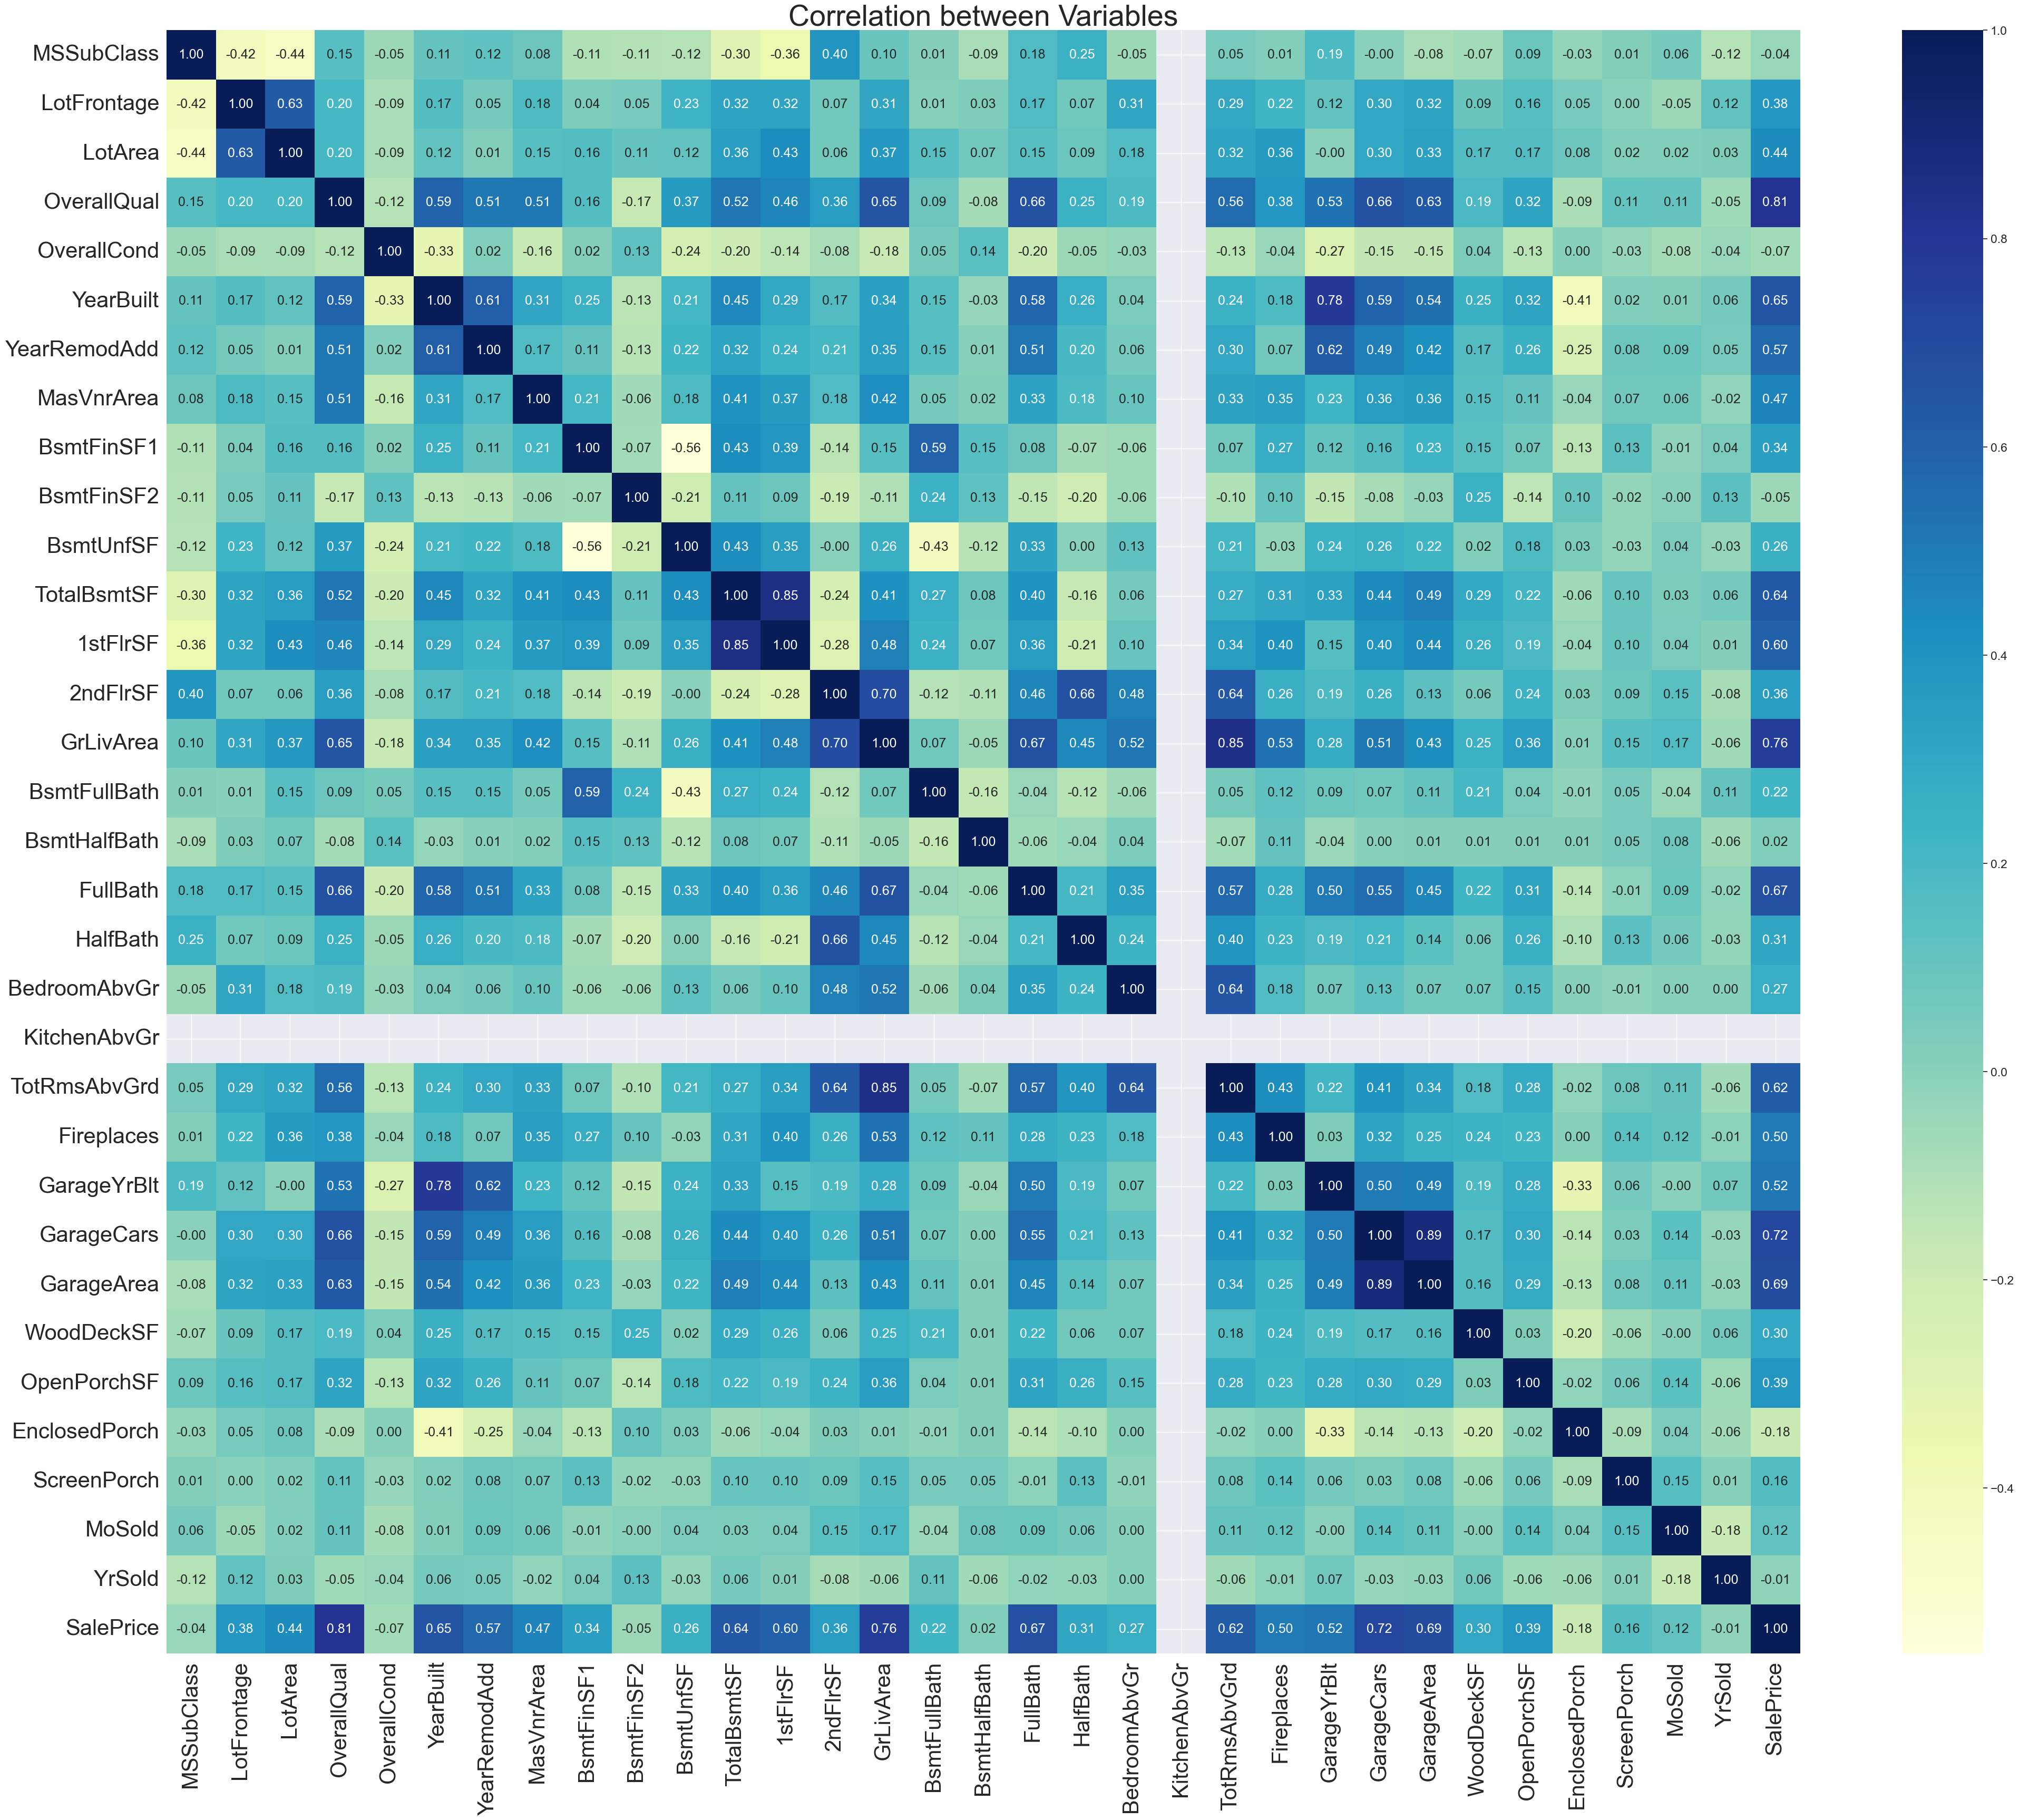

In [32]:
# We can visualize by plotting the correlations on a heatmap

plt.figure(figsize=(50,40))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True, fmt='.2f')
plt.title("Correlation between Variables", fontsize=40)
plt.show()

We can observe the following from the heatmap: 

    1) Sale price is highly positively correlated with OverallQual, GrLivArea
    2) Sale price is positively correlated with TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, GarageCars, GarageArea
    3) Sale price is not highly negatively correlated with other variables. 
    4) Some independent variables are highly correlated  with each other. 
    5) Yearbuilt GarageYrBlt are highly correlated
    6) TotRmsAbvGrd GrLivArea are highly correlated
    7) GarageArea GarageCars are highly correlated
    8) 1stFlrSF TotalBsmtSF are highly correlated

In [33]:
#We can drop some of these highly correlated variables 
housing_data.drop(['1stFlrSF','TotRmsAbvGrd','GarageArea', 'GarageYrBlt'], axis=1,inplace=True)

C:\Users\419340\AppData\Local\Temp\ipykernel_36608\2182546881.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = housing_data.corr()


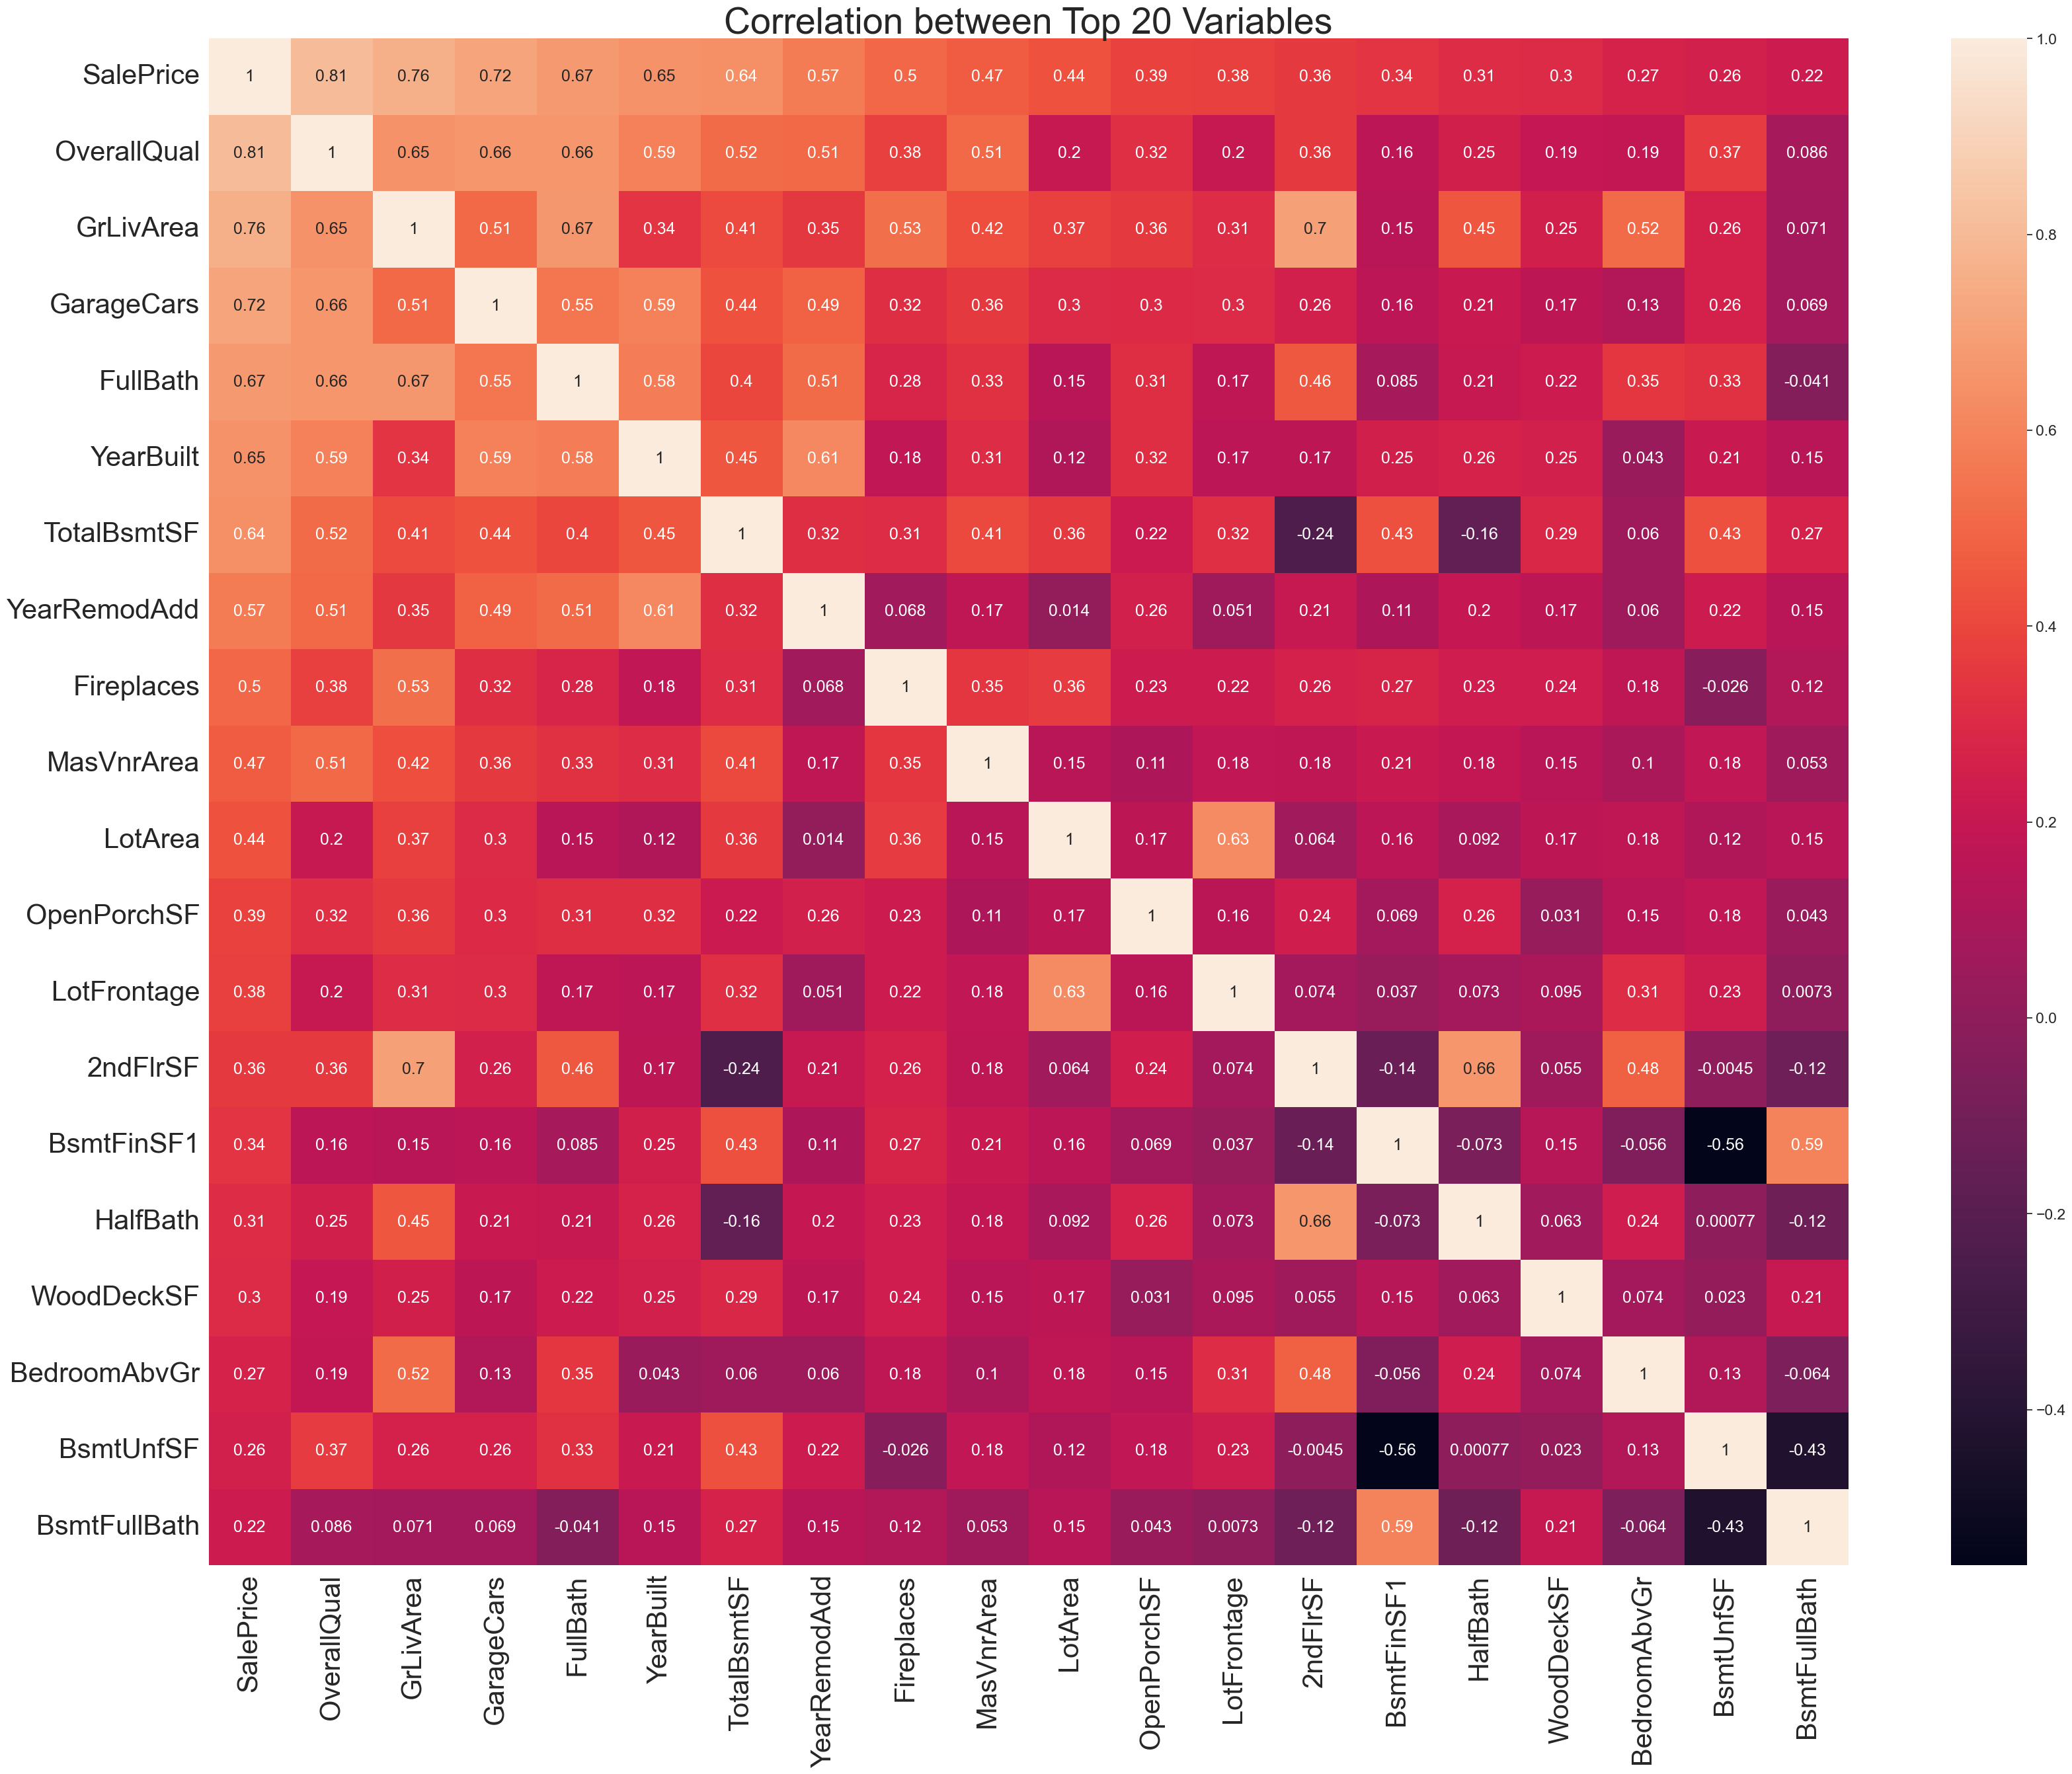

In [34]:
# Let us visualize the top 20 correlated variables with sales price using correlation matrix
n = 20 
plt.figure(figsize=(40,30))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

corrmat = housing_data.corr()

cols = corrmat.nlargest(n, 'SalePrice')['SalePrice'].index
sns.heatmap(housing_data[cols].corr(),annot=True)
plt.title("Correlation between Top 20 Variables", fontsize=40)
plt.show()

### 4. Data preparation

We need to start by creating dummy variables for the categorical data

In [35]:
#Find the columns with categorical data (non-numerical data)
house_categorical=housing_data.select_dtypes(include=['object'])
house_categorical.head()


MSZoning Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual Functional GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType SaleCondition
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           No          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ     Attchd          RFn         TA         TA          Y       WD        Normal
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg     MetalSd     MetalSd       None        TA        TA     CBlock       Gd       TA           Gd          ALQ          Unf    GasA        Ex          Y      SBrkr          TA        Typ     Attchd          RFn         TA         TA          Y       WD        Normal
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Mn          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ     Attchd          RFn         TA         TA          Y       WD        Normal
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA       Gd           No          ALQ          Unf    GasA        Gd          Y      SBrkr          Gd        Typ     Detchd          Unf         TA         TA          Y       WD       Abnorml
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Av          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ     Attchd          RFn         TA         TA          Y       WD        Normal

In [36]:
# Convert categorical value into Dummy variables
house_dummies=pd.get_dummies(house_categorical,drop_first=True)
house_dummies.head()

MSZoning_FV  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  Neighborhood_Veenker  Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  Condition2_Norm  Condition2_RRNn  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  HouseStyle_1.5Unf  \
0            0            1            0            1             0             0             1                0                0                1                  0              0                 1              0              0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0                     0                     0                    0                     0                 0                1                0                0                0                0                0                0                1                0                0                0               0                0                  0   
1            0            1            0            1             0             0             1                0                0                1                  0              1                 0              0              0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0                     0                     0                    0                     1                 1                0                0                0                0                0                0                0                1                0                0                0               0                0                  0   
2            0            1            0            1             0             0             0                0                0                1                  0              0                 1              0              0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0                     0                     0                    0                     0                 0                1                0                0                0                0                0                0                1                0                0                0               0                0                  0   
3            0            1            0            1      

Now, we need to perform scalling of the the data

In [37]:
# We need to drop categorical variables from the dataset and store it in variable X
X= housing_data.drop(list(house_categorical.columns), axis=1)

In [38]:
#Remove target variable from the data set
X=X.drop(['SalePrice'], axis=1)

In [39]:
#Put the target varible in y
y = housing_data['SalePrice']

In [40]:
# Now, we need to concat the dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [41]:
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  MSZoning_FV  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  \
0          60         65.0     8450            7            5       2003          2003       196.0       706.0         0.0      150.0        856.0     854.0     1710.0           1.0           0.0       2.0       1.0           3.0           1.0         0.0         2.0         0.0         61.0            0.0          0.0     2.0  2008.0            0            1            0            1             0             0             1                0                0                1                  0              0                 1              0              0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0                     0   
1          20         80.0     9600            6            8       1976          1976         0.0       978.0         0.0      284.0       1262.0       0.0     1262.0           0.0           1.0       2.0       0.0           3.0           1.0         1.0         2.0       298.0          0.0            0.0          0.0     5.0  2007.0            0            1            0            1             0             0             1                0                0                1                  0              1                 0              0              0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0                     0   
2          60         68.0    11250            7            5       2001          2002       162.0       486.0         0.0      434.0        920.0     866.0     1786.0           1.0           0.0       2.0       1.0           3.0           1.0         1.0         2.0         0.0         42.0            0.0          0.0     9.0  2008.0            0            1            0            1             0             0             0                0                0                1                  0              0                 1              0              0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0                     0   
3      

In [42]:
# Storing column names in cols
# Standardize a dataset along any axis
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'PavedDrive_Y', 'SaleType_CWD', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_WD', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=185)

In [43]:
X.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch    MoSold    YrSold  MSZoning_FV  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  \
0    0.225485    -0.289337 -0.339247     0.681046    -0.517243   1.010714      0.851105    0.371660    0.662998   -0.286902  -1.012413    -0.538829  1.194358   0.438934      1.283596     -0.247121  0.826061  1.245174      0.232454           0.0   -0.930660    0.349009   -0.798497     0.198420      -0.336279     -0.26154 -1.411511  0.106517    -0.221071     0.528977    -0.444325     0.059976     -0.160422     -0.059976      0.788729         -0.14825        -0.084972         0.277885          -0.277885      -0.192807          0.724286      -0.160422      -0.059976            -0.120605             -0.192807              -0.14825              2.598076             -0.171815             -0.238366             -0.246651            -0.202595             -0.084972             -0.182574           -0.444325             -0.084972            -0.202595             -0.135086             -0.262613              -0.29258           -0.084972               -0.212             -0.229848   
1   -0.797447     0.415890 -0.030741    -0.107385     2.388342   0.069239     -0.491029   -0.607095    1.315886   -0.286902  -0.701441     0.523154 -0.783205  -0.507723     -0.779061      4.046604  0.826061 -0.803101      0.232454           0.0    0.637361    0.349009    1.657442    -0.824318      -0.336279     -0.26154 -0.335460 -0.615717    -0.221071     0.528977    -0.444325     0.059976     -0.160422     -0.059976      0.788729         -0.14825        -0.084972         0.277885          -0.277885       5.186521         -1.380670      -0.160422      -0.059976            -0.120605             -0.192807              -0.14825             -0.384900             -0.171815             -0.238366             -0.246651            -0.202595             -0.084972             -0.182574           -0.444325             -0.084972            -0.202595             -0.135086             -0.262613              -0.29258           -0.084972               -0.212             -0.229848   
2    0.225485    -0.148291  0.411898     0.681046    -0.517243   0.940975      0.801397    0.201876    0.134927   -0.286902  -0.353337    -0.371423  1.222145   0.599527      1.283596     -0.247121  0.826061  1.245174      0.232454           0.0    0.637361    0.349009   -0.798497    -0.120138      -0.336279     -0.26154  1.099275  0.106517    -0.221071     0.528977    -0.444325     0.059976     -0.160422     -0.059976     -1.267863         -0.14825        -0.084972         0.277885          -0.277885      -0.192807          0.724286      -0.160422      -0.059976            -0.120605             -0.192807              -0.14825              2.598076             -0.171815             -0.238366             -0.246651            -0.202595             -0.084972             -0.182574           -0.444325             -0.084972            -0.202595             -0.135086             -0.262613              -0.29258           -0.084972               -0.212             -0.229848   
3    0.481218    -0.524412 -0.044154     0.681046    -0.517243  -2.057796  

Now, we need to perform splitting of the data into train and test data sets.

In [44]:
# split into train and test
X_train, X_test, y_train,  y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### 5. Perform feature engineering

Data modelling and evaluation

    In this section we will perform the following :

    1)create linear regression model using no feature elimination
    2)use ridge and lasso
    3)report the final model

In [45]:
# Instantiate linear regression
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

In [ ]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 train: ', r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 test: ',r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1: ',rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2: ',rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE train: ',mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE test: ',mse_test_lr)
metric.append(mse_test_lr**0.5)

We can see that the model using all of the features resulted in overfitting of the model. Even though we can see high R2 score of the training data, but this is due to the model learning the data and overfitting on the training data. In the following step, ridge and lasso are applied to compare the result.

In [ ]:
# Ridge Regression

In [ ]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

In [ ]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

In [ ]:
alpha = 100
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

In [ ]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

We can clearly see that, this model is fitting better than the none-regularised version seen earlier. The training score is lower than the regression model before, but the testing score has improved drastically.

In [ ]:
#Lasso regression
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

In [ ]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

In [ ]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

In [ ]:
lasso.coef_

In [ ]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

The result of Lasso regression seems to be better than Ridge regression.

In [ ]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

We can clearly see that the model with all of the features and no other processing results in overfitting. However, both Ridge and Lasso produce a better performing model, with Lasso outperforming Ridge slightly.

In [ ]:
#Predictions and Normality of Residuals

#Prediction using Ridge
ridge_pred = ridge.predict(X_test)

In [ ]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

We can confer from the graph that the linear relationship is presented by the Ridge regression model

In [ ]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals Ridge')
plt.xlabel("Residuals")
plt.show()

Residuals are slightly skewed in case of Ridge.

In [ ]:
#Prediction using Lasso
lasso_pred = lasso.predict(X_test)

In [ ]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

We can see the graph looks similar to Ridge.

In [ ]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals Lasso')
plt.xlabel("Residuals")
plt.show()

The residuals of Lasso are similar to Ridge but sightly less skewed.

In [ ]:
#Changes in Coefficients

In [ ]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

betas.head(68)

In [ ]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Lasso'] = lasso.coef_
betas.sort_values(by=['Lasso'], ascending=False)

In [ ]:
#Evaluation of the model

The model depicts that there are some variables that are more relevant to the sales price.
The higher values of positive coeeficients suggest a high sale value.
Some of those features are:

| Feature	| Description|
|-----------|-----------|
| GrLivArea	| Above grade (ground) living area square feet |
| OverallQual	|  Rates the overall material and finish of the house |
| OverallCond | 	Rates the overall condition of the house |
| TotalBsmtSF | 	Total square feet of basement area |
| YearBuilt	| Original construction date|

#### Alternate approach

Recursive feature elimination (RFE) 

The process of feature selection involves choosing a smaller group of the most important features (i.e., columns) from a dataset. The inclusion of fewer features can result in machine learning algorithms running more efficiently (with less complexity in space or time) and improving their effectiveness. Initially, all available variables are included in the model, and then the model complexity is reduced by iteratively dropping variables one by one. The model is then rebuilt after each variable is dropped to gauge the effect of that variable's removal.

In [ ]:
y_train_values=y_train.values.reshape(-1,1)

In [ ]:
rfe = RFE(lm,n_features_to_select=30)
rfe = rfe.fit(X_train, y_train)

In [ ]:
#Find the top features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
# Display the supported features
col = X_train.columns[rfe.support_]
col

In [ ]:
# Display the columns where rfe is false
colfls=X_train.columns[~rfe.support_]
colfls

In [ ]:
#Check the shape of train and test
# Creating X_train dataframe with RFE selected variables
X_train_rfe=X_train[col]
X_test_rfe=X_test[col]
print(X_train_rfe.shape)
print(X_test_rfe.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
y_train=y_train.values.reshape(-1,1)
y_train.shape

In [ ]:
# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe, has_constant='add')

In [ ]:
# running the model
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

A significant portion of the features in the dataset have high p-values, particularly those pertaining to the same areas of the house. For instance, the features related to the garage all have notably elevated p-values, with some being close to 1. 

In [ ]:
#Drop the constant
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

The Variance Inflation Factor (VIF) is a metric that offers a general indication of the correlation between the feature variables in a dataset. This is a critical parameter to consider when analyzing data, and high VIF values are generally indicative of high levels of multicollinearity. Multicollinearity can pose challenges for creating accurate predictive models, and as a result, features with high VIF values are often removed from analyses to improve model performance.

In [ ]:
#Checking VIF and rebuilding model

In [ ]:
# Function to calculate the VIF scores
def getVIF(X_train_rfe):
    vif = pd.DataFrame()
    X = X_train_rfe
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

getVIF(X_train_rfe)

In [ ]:
#Ridge Regression with RFE
#Now we will see the result of applying ridge regression to the features selected through the use of RFE

In [ ]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train_rfe, y_train) 

In [ ]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

In [ ]:
alpha = 20
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_rfe, y_train)
ridge.coef_

In [ ]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

We can see from the above result that the training accuracy is lower than what was generated before. However, the gap between training and testing data is lower. This may be a better model to use.

#### Subjective Questions

Question 1: What happens if you double the ideal alpha value?

In [ ]:
alpha = 200
ridgeDouble = Ridge(alpha=alpha)
ridgeDouble.fit(X_train, y_train)

In [ ]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridgeDouble.predict(X_train)
y_pred_test = ridgeDouble.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

We can see that after doubling the alpha value the training score has decreased slightly and test score has increased slightly.

In [ ]:
#Doubling the alpha for Ridge with RFE

In [ ]:
alpha = 40
ridgeRFE = Ridge(alpha=alpha)
ridgeRFE.fit(X_train_rfe, y_train)

In [ ]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridgeRFE.predict(X_train_rfe)
y_pred_test = ridgeRFE.predict(X_test_rfe)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

In [ ]:
#Doubling alpha for Lasso 

In [ ]:
alpha =0.002

lassoDouble = Lasso(alpha=alpha)
        
lassoDouble.fit(X_train, y_train) 

In [ ]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lassoDouble.predict(X_train)
y_pred_test = lassoDouble.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

We can see that after doubling the alpha value for the Lasso regression model the training score has decreased and the testing score has increased slightly compared to previous result.

In [ ]:
#important predictor variables
betas1 = pd.DataFrame(index=X_train.columns)
betas1.rows = X_train.columns
betas1['Lasso new'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas1.sort_values(by=['Lasso new'], ascending=False)

'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'OverallCond', 'YearBuilt' are the most important predictor variables in this model.

Question3 : After building the model, you realised that the five most important predictor variables in the 
lasso model are not available in the incoming data. You will now have to create another model 
excluding the five most important predictor variables. Which are the five most important 
predictor variables now?

In [ ]:
X_train2 = X_train.drop(['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'OverallCond', 'YearBuilt'],axis=1)
X_test2 = X_test.drop(['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'OverallCond', 'YearBuilt'],axis=1)

In [ ]:
alpha =0.001
lassonew = Lasso(alpha=alpha)
lassonew.fit(X_train2, y_train) 

In [ ]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lassonew.predict(X_train2)
y_pred_test = lassonew.predict(X_test2)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

Both train and test score have decreased a bit. However, the RSS value has shot up considerably

In [ ]:
#important predictor variables
betas = pd.DataFrame(index=X_train2.columns)
betas.rows = X_train.columns
betas['Lasso new'] = lassonew.coef_
pd.set_option('display.max_rows', None)
betas.sort_values(by=['Lasso new'], ascending=False)

New top predictor variables are BsmtFinSF1, BsmtUnfSF, MSZoning_RL, 2ndFlrSF, MSZoning_RM